In [12]:
import torch
import os
import pandas as pd
import albumentations as A
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
# model=torch.hub.load("ultralytics/yolov5","custom",path="C:/Users/uday.bijjala/Downloads/best_retrain_yolo.pt")
c=0
l=[]
st=["hue","gaussian","gauss"]
for i in os.listdir("D:/cat_id/data/raw/train_data/yolo/images"):
    l.append(i)
random.shuffle(l)
for i in l:
    # Define the transformation pipeline
    j=i.split(".")[0]
    d=0
    for k in st:
        if k in j:
            d=1
    if d==0:
        transform = A.Compose([
            A.Resize(512, 512),
            # A.HorizontalFlip(p=1),
            # A.RandomCrop(width=400, height=300),
            # A.RandomBrightnessContrast(p=0.5),
            #   A.Blur(p=1),
            # A.HueSaturationValue(p=1),
            # A.GaussianBlur(p=1),
            # A.RandomSizedBBoxSafeCrop(height=200,width=100),
            # A.Transpose(p=1)
            A.Crop(x_min=0,y_min=100,x_max=500,y_max=500,p=1),
            # A.VerticalFlip(p=0.5),
            # A.RandomRotate90(p=1),
            # A.RandomGridShuffle(p=0.5),
            # A.Normalize(),
            # zoom for front facing images
            # horizontal flip for side facing images
        ], bbox_params=A.BboxParams(format="pascal_voc",label_fields=['labels']))

        # Load and preprocess an example image and bounding box coordinates
        # la=pd.read_csv("D:/cat_id/data_structure/raw/train_data/yolo/labels/00000026_008.txt")
        try:
            la=pd.read_csv(f"D:/cat_id/data/raw/train_data/yolo/labels/{j}.txt")
            z=int(la.columns.values[0].split(" ")[0])
            if z==0:
                la=la.columns.values[0].split(" ")[1:]
                la=[float(k) for k in la]
                image = cv2.imread(f"D:/cat_id/data/raw/train_data/yolo/images/{j}.jpg")
                # results=model(image)
                # eye_numbered=0
                # for i in results.xyxy[0]:
                #     cl=i[-1]
                #     if cl==0:
                #         eye_numbered=eye_numbered+1
                # if eye_numbered==2:
                    
                bboxes = [la] 
                labels = ["cat"]  # Example class labels

                xmin=max(0,int(((la[0]*image.shape[1])-(la[2]*image.shape[1])/2)))
                ymin=max(0,int(((la[1]*image.shape[0])-(la[3]*image.shape[0])/2)))
                xmax=max(0,int(((la[0]*image.shape[1])+(la[2]*image.shape[1])/2)))
                ymax=max(0,int(((la[1]*image.shape[0])+(la[3]*image.shape[0])/2)))

                image1=image[ymin:ymin+(ymax-ymin)+40,xmin:xmin+(xmax-xmin)+40]
                n_xmin=0
                n_ymin=0
                n_xmax=image1.shape[1]-40
                n_ymax=image1.shape[0]-40
                n_bboxes=[[n_xmin,n_ymin,n_xmax,n_ymax]]

                # Apply the transformation pipeline to the image and bounding box coordinates
                transformed = transform(image=image1, bboxes=n_bboxes, labels=labels)

                # Retrieve the transformed image and updated bounding box coordinates
                transformed_image = transformed['image']
                transformed_bboxes = transformed['bboxes']
                transformed_labels = transformed['labels']

                xmin1=int(transformed_bboxes[0][0])
                ymin1=int(transformed_bboxes[0][1])
                xmax1=int(transformed_bboxes[0][2])
                ymax1=int(transformed_bboxes[0][3])

                center_x=(xmin1 + xmax1) / 2
                center_y=(ymin1+ymax1)/2
                width=xmax1-xmin1
                height=ymax1-ymin1
                center_x_normalized = center_x / transformed_image.shape[1]
                center_y_normalized = center_y / transformed_image.shape[0]
                width_normalized = width / transformed_image.shape[1]
                height_normalized=height/transformed_image.shape[0]
                cv2.imwrite(f"albumentations/cats/images_cats_remove_ears_half/{j}_trans_ears_removal_half.jpg",transformed_image)

                with open(f"albumentations/cats/labels_cats_remove_ears_half/{j}_trans_ears_removal_half.txt","w") as file:
                    file.write(str(0))
                    file.write(" ")
                    file.write(str(np.round(center_x_normalized,decimals=2)))
                    file.write(" ")
                    file.write(str(np.round(center_y_normalized,decimals=2)))
                    file.write(" ")
                    file.write(str(np.round(width_normalized,decimals=2)))
                    file.write(" ")
                    file.write(str(np.round(height_normalized,decimals=2)))

                # Visualize the transformed image with bounding boxes
                # for bbox, label in zip(transformed_bboxes, transformed_labels):
                #     xmin, ymin, xmax, ymax = bbox
                #     cv2.rectangle(transformed_image, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0, 255, 0), 2)
                #     cv2.putText(transformed_image, str(label), (int(xmin), int(ymin) - 10),
                #                 cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

                # Display the transformed image
                # plt.imshow( transformed_image)
                print(j)
                c=c+1
                print(c)
                if c==2000:
                    break
        except:
            print(0,j)

0 lizard_4345447b72fc2579
00000261_019
1
rotated_Birman_120_-11
2
0 bird_0f64e2de658625f0
0 Cats_Test158
rotated_Ragdoll_174_-61
3
rotated_Egyptian_Mau_181_45
4
00000110_029
5
rotated_00000193_025_-63
6
00000679_019
7
0 gimnasio_158_17_flickr
00000347_022
8
0 Cats_Test1468
rotated_00000240_020_83
9
00000107_024
10
0 rhodes2_44_
00001391_020
11
00000812_009
12
0 mouse_fec451bb09224ddc
0 tortoise_8bf29da483175217
00000532_027
13
0 tortoise_26158c07c79fd5f6
0 rabbit_6207fdcdc2cc2357
00000393_010
14
0 tv_studio_32_12_altavista
00001485_009
15
0 mouse_64ffd4ae7d4c7d9a
0 bird_09e9b1d5303a2396
0 Cats_Test3542
British_Shorthair_121
16
0 room452
0 bird_08ec23ac99153cc9
0 rabbit_2b002fc11f45d8ed
Siamese_154
17
Abyssinian_179
18
00000568_008
19
0 Cats_Test3472
00001204_016
20
00001068_001
21
00000828_001
22
00000596_021
23
0 bird_071ca596e286b9fe
00000843_014
24
0 new_salon
00000916_027
25
0 rabbit_04f593af996a13e2
0 bird_012a695a728c6af9
0 rabbit_817d8cbfd8bf4b41
Ragdoll_188
26
0 bird_154542e574

tortoise_b81c077a23f7292c
1


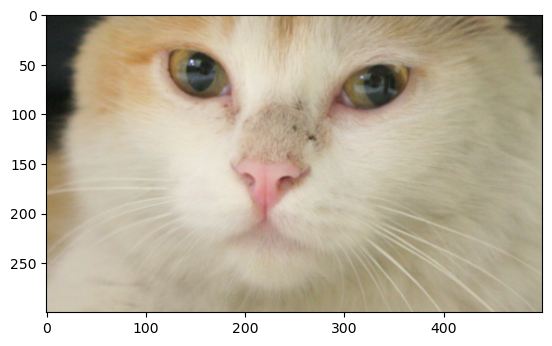

In [22]:
import torch
import os
import pandas as pd
import albumentations as A
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
# model=torch.hub.load("ultralytics/yolov5","custom",path="C:/Users/uday.bijjala/Downloads/best_retrain_yolo.pt")
c=0
l=[]
st=["hue","gaussian","gauss"]
for i in os.listdir("D:/cat_id/data/raw/train_data/yolo/images"):
    l.append(i)
random.shuffle(l)       
for i in l:
    # Define the transformation pipeline
    j=i.split(".")[0]
    d=0
    for k in st:
        if k in j:
            d=1
    if d==0:
        transform = A.Compose([
            A.Resize(512, 512),
            # A.HorizontalFlip(p=1),
            # A.RandomCrop(width=400, height=300),
            # A.RandomBrightnessContrast(p=0.5),
            #   A.Blur(p=1),
            # A.HueSaturationValue(p=1),
            # A.GaussianBlur(p=1),
            # A.RandomSizedBBoxSafeCrop(height=200,width=100),
            # A.Transpose(p=1)
            A.Crop(x_min=0,y_min=200,x_max=500,y_max=500,p=1),
            # A.VerticalFlip(p=0.5),
            # A.RandomRotate90(p=1),
            # A.RandomGridShuffle(p=0.5),
            # A.Normalize(),
            # zoom for front facing images
            # horizontal flip for side facing images
        ], bbox_params=A.BboxParams(format="pascal_voc",label_fields=['labels']))

        # Load and preprocess an example image and bounding box coordinates
        # la=pd.read_csv("D:/cat_id/data_structure/raw/train_data/yolo/labels/00000026_008.txt")
        try:
            la=pd.read_csv(f"D:/cat_id/data/raw/train_data/yolo/labels/00000033_021.txt")
            z=int(la.columns.values[0].split(" ")[0])
            if z==0:
                la=la.columns.values[0].split(" ")[1:]
                la=[float(k) for k in la]
                image = cv2.imread(f"D:/cat_id/data/raw/train_data/yolo/images/00000033_021.jpg")
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                # results=model(image)
                # eye_numbered=0
                # for i in results.xyxy[0]:
                #     cl=i[-1]
                #     if cl==0:
                #         eye_numbered=eye_numbered+1
                    
                bboxes = [la] 
                if z==0:
                    labels = ["cat"]
                if z==1:
                    labels=["dog"]  # Example class labels

                xmin=max(0,int(((la[0]*image.shape[1])-(la[2]*image.shape[1])/2)))
                ymin=max(0,int(((la[1]*image.shape[0])-(la[3]*image.shape[0])/2)))
                xmax=max(0,int(((la[0]*image.shape[1])+(la[2]*image.shape[1])/2)))
                ymax=max(0,int(((la[1]*image.shape[0])+(la[3]*image.shape[0])/2)))

                image1=image[ymin:ymin+(ymax-ymin)+40,xmin:xmin+(xmax-xmin)+40]
                n_xmin=0
                n_ymin=0
                n_xmax=image1.shape[1]-40
                n_ymax=image1.shape[0]-40
                n_bboxes=[[n_xmin,n_ymin,n_xmax,n_ymax]]

                # Apply the transformation pipeline to the image and bounding box coordinates
                transformed = transform(image=image1, bboxes=n_bboxes, labels=labels)

                # Retrieve the transformed image and updated bounding box coordinates
                transformed_image = transformed['image']
                transformed_bboxes = transformed['bboxes']
                transformed_labels = transformed['labels']

                xmin1=int(transformed_bboxes[0][0])
                ymin1=int(transformed_bboxes[0][1])
                xmax1=int(transformed_bboxes[0][2])
                ymax1=int(transformed_bboxes[0][3])

                center_x=(xmin1 + xmax1) / 2
                center_y=(ymin1+ymax1)/2
                width=xmax1-xmin1
                height=ymax1-ymin1
                center_x_normalized = center_x / transformed_image.shape[1]
                center_y_normalized = center_y / transformed_image.shape[0]
                width_normalized = width / transformed_image.shape[1]
                height_normalized=height/transformed_image.shape[0]
                # cv2.imwrite(f"albumentations/cats/images_remove_chin_2000/{j}_trans_chin_removal.jpg",transformed_image)
                # print(1)
                # with open(f"albumentations/cats/labels_remove_chin_2000/{j}_trans_chin_removal.txt","w") as file:
                #     if transformed_labels==["cat"]:
                #         file.write(str(0))
                #     if transformed_labels==["dog"]:
                #         file.write(str(1))
                #     file.write(" ")
                #     file.write(str(np.round(center_x_normalized,decimals=2)))
                #     file.write(" ")
                #     file.write(str(np.round(center_y_normalized,decimals=2)))
                #     file.write(" ")
                #     file.write(str(np.round(width_normalized,decimals=2)))
                #     file.write(" ")
                #     file.write(str(np.round(height_normalized,decimals=2)))

                # Visualize the transformed image with bounding boxes
                # for bbox, label in zip(transformed_bboxes, transformed_labels):
                #     xmin, ymin, xmax, ymax = bbox
                #     cv2.rectangle(transformed_image, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0, 255, 0), 2)
                #     cv2.putText(transformed_image, str(label), (int(xmin), int(ymin) - 10),
                #                 cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

                # Display the transformed image
                plt.imshow( transformed_image)
                print(j)
                c=c+1
                print(c)
                if c==1:
                    break
        except:
            print(0,j)

n02107908_599
1


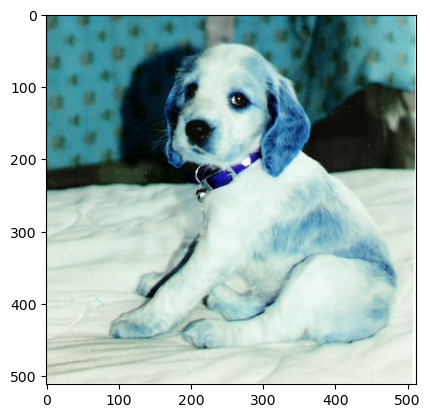

In [4]:
import torch
import os
import pandas as pd
import albumentations as A
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
# model=torch.hub.load("ultralytics/yolov5","custom",path="C:/Users/uday.bijjala/Downloads/best_retrain_yolo.pt")
c=0
l=[]
st=["hue","gaussian","gauss"]
for i in os.listdir("D:/cat_id/data/raw/train_data/yolo/images"):
    l.append(i)
random.shuffle(l)
for i in l:
    # Define the transformation pipeline
    j=i.split(".")[0]
    d=0
    for k in st:
        if k in j:
            d=1
    if d==0:
        transform = A.Compose([
            A.Resize(512, 512),
            A.HorizontalFlip(p=1),
            # A.RandomCrop(width=400, height=300),
            # A.RandomBrightnessContrast(p=0.5),
            #   A.Blur(p=1),
            # A.HueSaturationValue(p=1),
            # A.GaussianBlur(p=1),
            # A.RandomSizedBBoxSafeCrop(height=200,width=100),
            # A.Transpose(p=1)
            # A.Crop(x_min=0,y_min=200,x_max=500,y_max=500,p=1),
            # A.VerticalFlip(p=0.5),
            # A.RandomRotate90(p=1),
            # A.RandomGridShuffle(p=0.5),
            # A.Normalize(),
            # zoom for front facing images
            # horizontal flip for side facing images
        ], bbox_params=A.BboxParams(format="pascal_voc",label_fields=['labels']))

        # Load and preprocess an example image and bounding box coordinates
        # la=pd.read_csv("D:/cat_id/data_structure/raw/train_data/yolo/labels/00000026_008.txt")
        try:
            la=pd.read_csv(f"D:/cat_id/data/raw/train_data/yolo/labels/english_cocker_spaniel_157.txt")
            z=int(la.columns.values[0].split(" ")[0])
            if z==1:
                la=la.columns.values[0].split(" ")[1:]
                la=[float(k) for k in la]
                image = cv2.imread(f"D:/cat_id/data/raw/train_data/yolo/images/english_cocker_spaniel_157.jpg")
                # results=model(image)
                # eye_numbered=0
                # for i in results.xyxy[0]:
                #     cl=i[-1]
                #     if cl==0:
                #         eye_numbered=eye_numbered+1
                # if eye_numbered==2:
                    
                bboxes = [la] 
                if z==0:
                    labels = ["cat"]
                if z==1:
                    labels=["dog"]  # Example class labels


                xmin=max(0,int(((la[0]*image.shape[1])-(la[2]*image.shape[1])/2)))
                ymin=max(0,int(((la[1]*image.shape[0])-(la[3]*image.shape[0])/2)))
                xmax=max(0,int(((la[0]*image.shape[1])+(la[2]*image.shape[1])/2)))
                ymax=max(0,int(((la[1]*image.shape[0])+(la[3]*image.shape[0])/2)))

                # image1=image[ymin:ymin+(ymax-ymin)+40,xmin:xmin+(xmax-xmin)+40]
                # n_xmin=0
                # n_ymin=0
                # n_xmax=image1.shape[1]-40
                # n_ymax=image1.shape[0]-40
                n_bboxes=[[xmin,ymin,xmax,ymax]]

                # Apply the transformation pipeline to the image and bounding box coordinates
                transformed = transform(image=image, bboxes=n_bboxes, labels=labels)

                # Retrieve the transformed image and updated bounding box coordinates
                transformed_image = transformed['image']
                transformed_bboxes = transformed['bboxes']
                transformed_labels = transformed['labels']

                xmin1=int(transformed_bboxes[0][0])
                ymin1=int(transformed_bboxes[0][1])
                xmax1=int(transformed_bboxes[0][2])
                ymax1=int(transformed_bboxes[0][3])

                center_x=(xmin1 + xmax1) / 2
                center_y=(ymin1+ymax1)/2
                width=xmax1-xmin1
                height=ymax1-ymin1
                center_x_normalized = center_x / transformed_image.shape[1]
                center_y_normalized = center_y / transformed_image.shape[0]
                width_normalized = width / transformed_image.shape[1]
                height_normalized=height/transformed_image.shape[0]
                # cv2.imwrite(f"albumentations/dogs/images_dogs_flip_2000/{j}_trans_flip.jpg",transformed_image)

                # with open(f"albumentations/dogs/labels_dogs_flip_2000/{j}_trans_flip.txt","w") as file:
                #     if transformed_labels==["cat"]:
                #         file.write(str(0))
                #     if transformed_labels==["dog"]:
                #         file.write(str(1))
                #     file.write(" ")
                #     file.write(str(np.round(center_x_normalized,decimals=2)))
                #     file.write(" ")
                #     file.write(str(np.round(center_y_normalized,decimals=2)))
                #     file.write(" ")
                #     file.write(str(np.round(width_normalized,decimals=2)))
                #     file.write(" ")
                #     file.write(str(np.round(height_normalized,decimals=2)))

                # Visualize the transformed image with bounding boxes
                # for bbox, label in zip(transformed_bboxes, transformed_labels):
                #     xmin, ymin, xmax, ymax = bbox
                #     cv2.rectangle(transformed_image, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0, 255, 0), 2)
                #     cv2.putText(transformed_image, str(label), (int(xmin), int(ymin) - 10),
                #                 cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

                # Display the transformed image
                plt.imshow( transformed_image)
                print(j)
                c=c+1
                print(c)
                if c==1:
                    break
        except:
            print(0,j)

In [3]:
import torch
import os
import pandas as pd
import albumentations as A
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
# model=torch.hub.load("ultralytics/yolov5","custom",path="C:/Users/uday.bijjala/Downloads/best_retrain_yolo.pt")
c=0
l=[]
for i in os.listdir("D:/cat_id/data/raw/train_data/yolo/images"):
    l.append(i)
random.shuffle(l)
for i in l:
    # Define the transformation pipeline
    j=i.split(".")[0]
    transform = A.Compose([
        A.Resize(512, 512),
        # A.HorizontalFlip(p=1),
        # A.RandomCrop(width=400, height=300),
        # A.RandomBrightnessContrast(p=0.5),
        #   A.Blur(p=1),
        # A.HueSaturationValue(p=1),
        # A.GaussianBlur(p=1),
        # A.RandomSizedBBoxSafeCrop(height=200,width=100),
        # A.Transpose(p=1)
        # A.Crop(x_min=0,y_min=200,x_max=500,y_max=500,p=1),
        A.Rotate(p=1,limit=[40,40]),
        # A.VerticalFlip(p=0.5),
        # A.RandomRotate90(p=1),
        # A.RandomGridShuffle(p=0.5),
        # A.Normalize(),
        # zoom for front facing images
        # horizontal flip for side facing images
    ], bbox_params=A.BboxParams(format="pascal_voc",label_fields=['labels']))

    # Load and preprocess an example image and bounding box coordinates
    # la=pd.read_csv("D:/cat_id/data_structure/raw/train_data/yolo/labels/00000026_008.txt")
    try:
        la=pd.read_csv(f"D:/cat_id/data/raw/train_data/yolo/labels/english_cocker_spaniel_157.txt")
        z=int(la.columns.values[0].split(" ")[0])
        if z==1:
            la=la.columns.values[0].split(" ")[1:]
            la=[float(k) for k in la]
            image = cv2.imread(f"D:/cat_id/data/raw/train_data/yolo/images/english_cocker_spaniel_157.jpg")
            # results=model(image)
            # eye_numbered=0
            # for i in results.xyxy[0]:
            #     cl=i[-1]
            #     if cl==0:
            #         eye_numbered=eye_numbered+1
            # if eye_numbered==2:
                
            bboxes = [la] 
            if z==0:
                labels = ["cat"]
            if z==1:
                labels=["dog"]  # Example class labels


            xmin=max(0,int(((la[0]*image.shape[1])-(la[2]*image.shape[1])/2)))
            ymin=max(0,int(((la[1]*image.shape[0])-(la[3]*image.shape[0])/2)))
            xmax=max(0,int(((la[0]*image.shape[1])+(la[2]*image.shape[1])/2)))
            ymax=max(0,int(((la[1]*image.shape[0])+(la[3]*image.shape[0])/2)))

            image1=image[ymin:ymin+(ymax-ymin)+40,xmin:xmin+(xmax-xmin)+40]
            n_xmin=0
            n_ymin=0
            n_xmax=image1.shape[1]-40
            n_ymax=image1.shape[0]-40
            n_bboxes=[[n_xmin,n_ymin,n_xmax,n_ymax]]

            # Apply the transformation pipeline to the image and bounding box coordinates
            transformed = transform(image=image1, bboxes=n_bboxes, labels=labels)

            # Retrieve the transformed image and updated bounding box coordinates
            transformed_image = transformed['image']
            transformed_bboxes = transformed['bboxes']
            transformed_labels = transformed['labels']

            xmin1=int(transformed_bboxes[0][0])
            ymin1=int(transformed_bboxes[0][1])
            xmax1=int(transformed_bboxes[0][2])
            ymax1=int(transformed_bboxes[0][3])

            center_x=(xmin1 + xmax1) / 2
            center_y=(ymin1+ymax1)/2
            width=xmax1-xmin1
            height=ymax1-ymin1
            center_x_normalized = center_x / transformed_image.shape[1]
            center_y_normalized = center_y / transformed_image.shape[0]
            width_normalized = width / transformed_image.shape[1]
            height_normalized=height/transformed_image.shape[0]
            # cv2.imwrite(f"albumentations/dogs/images_dogs_rotate_40/{j}_rotate_40.jpg",transformed_image)

            # with open(f"albumentations/dogs/labels_dogs_rotate_40/{j}_rotate_40.txt","w") as file:
            #     if transformed_labels==["cat"]:
            #         file.write(str(0))
            #     if transformed_labels==["dog"]:
            #         file.write(str(1))
            #     file.write(" ")
            #     file.write(str(np.round(center_x_normalized,decimals=2)))
            #     file.write(" ")
            #     file.write(str(np.round(center_y_normalized,decimals=2)))
            #     file.write(" ")
            #     file.write(str(np.round(width_normalized,decimals=2)))
            #     file.write(" ")
            #     file.write(str(np.round(height_normalized,decimals=2)))

            # Visualize the transformed image with bounding boxes
            # for bbox, label in zip(transformed_bboxes, transformed_labels):
            #     xmin, ymin, xmax, ymax = bbox
            #     cv2.rectangle(transformed_image, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0, 255, 0), 2)
            #     cv2.putText(transformed_image, str(label), (int(xmin), int(ymin) - 10),
            #                 cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

            # Display the transformed image
            plt.imshow( transformed_image)
            print(j)
            c=c+1
            print(c)
            if c==2000:
                break
    except:
        print(0,j)

rotated_n02102177_392_78
1
n02096051_4196__gaussianNoise
2
n02097298_4909
3
n02097209_4206
4
0 bird_02881331edb14819
n02087394_11442
5
rotated_n02096437_811_-55
6
n02115913_915
7
n02086910_1957__hue_saturation
8
n02093859_801
9
0 mouse_fe971f526b380eed__gaussianBlur
0 bird_0c0d9b8fe773311e
n02095570_2972
10
0 fitness_center3
n02088094_2559
11
0 rabbit_fb986ad617299258
0 Cats_Test160
n02102177_2524
12
Cats_Test1405__gaussianNoise
13
0 hamster_90347d905cc0bd8f
0 rabbit_04dd5018cacf40a8
n02088632_679__gaussianBlur
14
0 pantry_87_07_flickr
n02106662_24577
15
n02088466_7606
16
samoyed_189
17
0 bird_17af8580495d0bc4__hue_saturation
rotated_n02110958_13581_74
18
0 smallsp026
0 tortoise_7e64fadc91d3f2ce
0 rabbit_149a44c920f4902e
0 Cats_Test772
0 lizard_56f1c8e0c20e86da
0 rabbit_096e9588680358d2
Cats_Test2277__hue_saturation
19
n02095889_3047
20
n02094258_2506
21
scottish_terrier_17
22
0 nursery_005
0 int890
n02086240_4608
23
0 Cats_Test3031
0 tortoise_c7df4ec66ee2f5a7
n02091831_8160
24
n021100

In [4]:
import torch
import os
import pandas as pd
import albumentations as A
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
# model=torch.hub.load("ultralytics/yolov5","custom",path="C:/Users/uday.bijjala/Downloads/best_retrain_yolo.pt")
c=0
l=[]
for i in os.listdir("D:/cat_id/data/raw/train_data/yolo/images"):
    l.append(i)
random.shuffle(l)
for i in l:
    # Define the transformation pipeline
    j=i.split(".")[0]
    transform = A.Compose([
        A.Resize(512, 512),
        # A.HorizontalFlip(p=1),
        # A.RandomCrop(width=400, height=300),
        # A.RandomBrightnessContrast(p=0.5),
        #   A.Blur(p=1),
        # A.HueSaturationValue(p=1),
        # A.GaussianBlur(p=1),
        # A.RandomSizedBBoxSafeCrop(height=200,width=100),
        # A.Transpose(p=1)
        # A.Crop(x_min=0,y_min=200,x_max=500,y_max=500,p=1),
        A.Rotate(p=1,limit=[320,320]),
        # A.VerticalFlip(p=0.5),
        # A.RandomRotate90(p=1),
        # A.RandomGridShuffle(p=0.5),
        # A.Normalize(),
        # zoom for front facing images
        # horizontal flip for side facing images
    ], bbox_params=A.BboxParams(format="pascal_voc",label_fields=['labels']))

    # Load and preprocess an example image and bounding box coordinates
    # la=pd.read_csv("D:/cat_id/data_structure/raw/train_data/yolo/labels/00000026_008.txt")
    try:
        la=pd.read_csv(f"D:/cat_id/data/raw/train_data/yolo/labels/{j}.txt")
        z=int(la.columns.values[0].split(" ")[0])
        if z==1:
            la=la.columns.values[0].split(" ")[1:]
            la=[float(k) for k in la]
            image = cv2.imread(f"D:/cat_id/data/raw/train_data/yolo/images/{j}.jpg")
            # results=model(image)
            # eye_numbered=0
            # for i in results.xyxy[0]:
            #     cl=i[-1]
            #     if cl==0:
            #         eye_numbered=eye_numbered+1
            # if eye_numbered==2:
                
            bboxes = [la] 
            if z==0:
                labels = ["cat"]
            if z==1:
                labels=["dog"]  # Example class labels


            xmin=max(0,int(((la[0]*image.shape[1])-(la[2]*image.shape[1])/2)))
            ymin=max(0,int(((la[1]*image.shape[0])-(la[3]*image.shape[0])/2)))
            xmax=max(0,int(((la[0]*image.shape[1])+(la[2]*image.shape[1])/2)))
            ymax=max(0,int(((la[1]*image.shape[0])+(la[3]*image.shape[0])/2)))

            image1=image[ymin:ymin+(ymax-ymin)+40,xmin:xmin+(xmax-xmin)+40]
            n_xmin=0
            n_ymin=0
            n_xmax=image1.shape[1]-40
            n_ymax=image1.shape[0]-40
            n_bboxes=[[n_xmin,n_ymin,n_xmax,n_ymax]]

            # Apply the transformation pipeline to the image and bounding box coordinates
            transformed = transform(image=image1, bboxes=n_bboxes, labels=labels)

            # Retrieve the transformed image and updated bounding box coordinates
            transformed_image = transformed['image']
            transformed_bboxes = transformed['bboxes']
            transformed_labels = transformed['labels']

            xmin1=int(transformed_bboxes[0][0])
            ymin1=int(transformed_bboxes[0][1])
            xmax1=int(transformed_bboxes[0][2])
            ymax1=int(transformed_bboxes[0][3])

            center_x=(xmin1 + xmax1) / 2
            center_y=(ymin1+ymax1)/2
            width=xmax1-xmin1
            height=ymax1-ymin1
            center_x_normalized = center_x / transformed_image.shape[1]
            center_y_normalized = center_y / transformed_image.shape[0]
            width_normalized = width / transformed_image.shape[1]
            height_normalized=height/transformed_image.shape[0]
            cv2.imwrite(f"albumentations/dogs/images_dogs_rotate_320/{j}_rotate_320.jpg",transformed_image)

            with open(f"albumentations/dogs/labels_dogs_rotate_320/{j}_rotate_320.txt","w") as file:
                if transformed_labels==["cat"]:
                    file.write(str(0))
                if transformed_labels==["dog"]:
                    file.write(str(1))
                file.write(" ")
                file.write(str(np.round(center_x_normalized,decimals=2)))
                file.write(" ")
                file.write(str(np.round(center_y_normalized,decimals=2)))
                file.write(" ")
                file.write(str(np.round(width_normalized,decimals=2)))
                file.write(" ")
                file.write(str(np.round(height_normalized,decimals=2)))

            # Visualize the transformed image with bounding boxes
            # for bbox, label in zip(transformed_bboxes, transformed_labels):
            #     xmin, ymin, xmax, ymax = bbox
            #     cv2.rectangle(transformed_image, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0, 255, 0), 2)
            #     cv2.putText(transformed_image, str(label), (int(xmin), int(ymin) - 10),
            #                 cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

            # Display the transformed image
            # plt.imshow( transformed_image)
            print(j)
            c=c+1
            print(c)
            if c==2000:
                break
    except:
        print(0,j)

n02091467_5879
1
0 Cats_Test1644
n02089078_2903__gaussianNoise
2
n02105412_4556__gaussianNoise
3
n02086079_7769
4
n02106550_3313
5
0 Cats_Test2273
n02092002_6729
6
n02107142_5144
7
rotated_n02113799_336_-24
8
0 hamster_35adf8d8c9b9ba50
n02096437_1613
9
n02092339_2103
10
0 pantry_36_17_flickr
n02088466_10773
11
0 rabbit_f05395ba9f273521
0 Cats_Test3346
0 rabbit_0f245a6c3b6c888c
Cats_Test529__hue_saturation
12
n02102318_9197
13
n02094258_936
14
rotated_Cats_Test1771_-49
15
n02115913_1631
16
n02093754_1833
17
0 tortoise_88cdf3e94fda84ba
saint_bernard_134
18
n02089973_811
19
0 lizard_dd6d991acd02ec57
saint_bernard_136
20
0 Informatica5
0 bird_139ae6a9cacb2d8e
n02110958_13391
21
samoyed_135
22
n02096051_2002
23
rotated_n02096437_2504_-33
24
0 bird_0e30885f209d0c58__hue_saturation
rotated_n02099712_2223_87
25
0 lizard_988cca2be965ec9a
n02088094_3749
26
Cats_Test3597__hue_saturation__gaussianNoise
27
0 tortoise_5900fd00888c6570
0 Cats_Test151
0 lizard_c0506cdf0f684592
0 rabbit_d5035ad599c2b47

In [12]:
import torch
import os
import pandas as pd
import albumentations as A
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
# model=torch.hub.load("ultralytics/yolov5","custom",path="C:/Users/uday.bijjala/Downloads/best_retrain_yolo.pt")
c=0
l=[]
for i in os.listdir("D:/cat_id/data/raw/train_data/yolo/images"):
    l.append(i)
random.shuffle(l) 
for i in l:
    # Define the transformation pipeline
    j=i.split(".")[0]
    transform = A.Compose([
        A.Resize(512, 512),
        # A.HorizontalFlip(p=1),
        # A.RandomCrop(width=400, height=300),
        # A.RandomBrightnessContrast(p=0.5),
        #   A.Blur(p=1),
        # A.HueSaturationValue(p=1),
        # A.GaussianBlur(p=1),
        # A.RandomSizedBBoxSafeCrop(height=200,width=100),
        # A.Transpose(p=1)
        # A.Crop(x_min=0,y_min=200,x_max=500,y_max=500,p=1),
        A.Rotate(p=1,limit=[320,320]),
        # A.VerticalFlip(p=0.5),
        # A.RandomRotate90(p=1),
        # A.RandomGridShuffle(p=0.5),
        # A.Normalize(),
        # zoom for front facing images
        # horizontal flip for side facing images
    ], bbox_params=A.BboxParams(format="pascal_voc",label_fields=['labels']))

    # Load and preprocess an example image and bounding box coordinates
    # la=pd.read_csv("D:/cat_id/data_structure/raw/train_data/yolo/labels/00000026_008.txt")
    try:
        la=pd.read_csv(f"D:/cat_id/data/raw/train_data/yolo/labels/{j}.txt")
        z=int(la.columns.values[0].split(" ")[0])
        if z==0:
            la=la.columns.values[0].split(" ")[1:]
            la=[float(k) for k in la]
            image = cv2.imread(f"D:/cat_id/data/raw/train_data/yolo/images/{j}.jpg")
            # results=model(image)
            # eye_numbered=0
            # for i in results.xyxy[0]:
            #     cl=i[-1]
            #     if cl==0:
            #         eye_numbered=eye_numbered+1
            # if eye_numbered==2:
                
            bboxes = [la] 
            if z==0:
                labels = ["cat"]
            if z==1:
                labels=["dog"]  # Example class labels


            xmin=max(0,int(((la[0]*image.shape[1])-(la[2]*image.shape[1])/2)))
            ymin=max(0,int(((la[1]*image.shape[0])-(la[3]*image.shape[0])/2)))
            xmax=max(0,int(((la[0]*image.shape[1])+(la[2]*image.shape[1])/2)))
            ymax=max(0,int(((la[1]*image.shape[0])+(la[3]*image.shape[0])/2)))

            image1=image[ymin:ymin+(ymax-ymin)+40,xmin:xmin+(xmax-xmin)+40]
            n_xmin=0
            n_ymin=0
            n_xmax=image1.shape[1]-40
            n_ymax=image1.shape[0]-40
            n_bboxes=[[n_xmin,n_ymin,n_xmax,n_ymax]]

            # Apply the transformation pipeline to the image and bounding box coordinates
            transformed = transform(image=image1, bboxes=n_bboxes, labels=labels)

            # Retrieve the transformed image and updated bounding box coordinates
            transformed_image = transformed['image']
            transformed_bboxes = transformed['bboxes']
            transformed_labels = transformed['labels']

            xmin1=int(transformed_bboxes[0][0])
            ymin1=int(transformed_bboxes[0][1])
            xmax1=int(transformed_bboxes[0][2])
            ymax1=int(transformed_bboxes[0][3])

            center_x=(xmin1 + xmax1) / 2
            center_y=(ymin1+ymax1)/2
            width=xmax1-xmin1
            height=ymax1-ymin1
            center_x_normalized = center_x / transformed_image.shape[1]
            center_y_normalized = center_y / transformed_image.shape[0]
            width_normalized = width / transformed_image.shape[1]
            height_normalized=height/transformed_image.shape[0]
            cv2.imwrite(f"albumentations/cats/images_cats_rotate_320/{j}_rotate_320.jpg",transformed_image)

            with open(f"albumentations/cats/labels_cats_rotate_320/{j}_rotate_320.txt","w") as file:
                if transformed_labels==["cat"]:
                    file.write(str(0))
                if transformed_labels==["dog"]:
                    file.write(str(1))
                file.write(" ")
                file.write(str(np.round(center_x_normalized,decimals=2)))
                file.write(" ")
                file.write(str(np.round(center_y_normalized,decimals=2)))
                file.write(" ")
                file.write(str(np.round(width_normalized,decimals=2)))
                file.write(" ")
                file.write(str(np.round(height_normalized,decimals=2)))

            # Visualize the transformed image with bounding boxes
            # for bbox, label in zip(transformed_bboxes, transformed_labels):
            #     xmin, ymin, xmax, ymax = bbox
            #     cv2.rectangle(transformed_image, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0, 255, 0), 2)
            #     cv2.putText(transformed_image, str(label), (int(xmin), int(ymin) - 10),
            #                 cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

            # Display the transformed image
            # plt.imshow( transformed_image)
            print(j)
            c=c+1
            print(c)
            if c==1000:
                break
    except:
        print(0,j)

00000174_018
1
0 Cats_Test403
00000833_017
2
rotated_00001095_003_-33
3
0 Cats_Test3273
00000882_020__hue_saturation
4
0 tortoise_339de64c64f772d2
0 lizard_35f8873fc264ff7c
Siamese_169
5
00000527_004
6
rotated_00001080_026_-65
7
00000543_013
8
0 d1
0 rabbit_e9e8253c122c56ef
0 int871
0 gimnasio_55_10_flickr
00001267_009__gaussianBlur
9
Ragdoll_122
10
0 rabbit_454c167f1b79d684
00001005_020
11
00000961_017
12
00000516_003
13
0 lizard_4052785597a038c3
0 Cats_Test905
rotated_00001360_019_87
14
00000334_028
15
00000874_023
16
00000272_007__gaussianBlur
17
0 lizard_2d8c06bbe039d3aa
00000380_007
18
00000365_006__hue_saturation
19
00001114_019__gaussianBlur__hue_saturation
20
00001173_024
21
0 Spielzeug_35_09_flickr
00000871_018
22
0 int244__hue_saturation
0 tortoise_ec34568f627a8e12
0 Dinning_Room_1
00001065_024
23
00000166_021
24
Birman_179
25
00001012_003
26
0 rabbit_4e0e1c63274fbaf6__gaussianBlur
Maine_Coon_160
27
rotated_00000096_019__gaussianBlur_-88
28
0 mouse_ffe0b8262694e9f4
0 rabbit_d

rotated_00001365_021_42
1


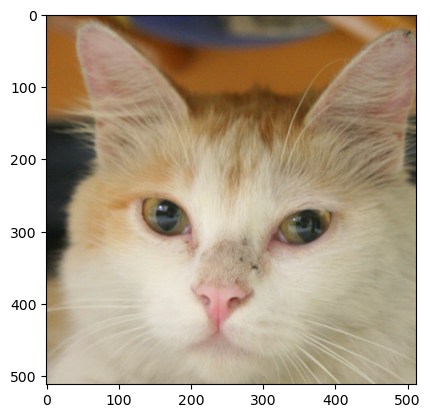

In [21]:
import torch
import os
import pandas as pd
import albumentations as A
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
# model=torch.hub.load("ultralytics/yolov5","custom",path="C:/Users/uday.bijjala/Downloads/best_retrain_yolo.pt")
c=0
l=[]
st=["hue","gaussian","gauss"]
for i in os.listdir("D:/cat_id/data/raw/train_data/yolo/images"):
    l.append(i)
random.shuffle(l)
for i in l: 
    # Define the transformation pipeline
    j=i.split(".")[0]
    d=0
    for k in st:
        if k in j:
            d=1
    if d==0:
        transform = A.Compose([
            A.Resize(512, 512),
            # A.HorizontalFlip(p=1),
            # A.RandomCrop(width=400, height=300),
            # A.RandomBrightnessContrast(p=0.5),
            #   A.Blur(p=1),
            # A.HueSaturationValue(p=1),
            # A.GaussianBlur(p=1),
            # A.RandomSizedBBoxSafeCrop(height=200,width=100),
            # A.Transpose(p=1)
            # A.Crop(x_min=0,y_min=200,x_max=500,y_max=500,p=1),
            # A.VerticalFlip(p=0.5),
            # A.RandomRotate90(p=1),
            # A.RandomGridShuffle(p=0.5),
            # A.Normalize(),
            # zoom for front facing images
            # horizontal flip for side facing images
        ], bbox_params=A.BboxParams(format="pascal_voc",label_fields=['labels']))

        # Load and preprocess an example image and bounding box coordinates
        # la=pd.read_csv("D:/cat_id/data_structure/raw/train_data/yolo/labels/00000026_008.txt")
        try:
            la=pd.read_csv(f"D:/cat_id/data/raw/train_data/yolo/labels/00000033_021.txt")
            z=int(la.columns.values[0].split(" ")[0])
            if z==0:
                la=la.columns.values[0].split(" ")[1:]
                la=[float(k) for k in la]
                image = cv2.imread(f"D:/cat_id/data/raw/train_data/yolo/images/00000033_021.jpg")
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                # results=model(image)
                # eye_numbered=0
                # for i in results.xyxy[0]:
                #     cl=i[-1]
                #     if cl==0:
                #         eye_numbered=eye_numbered+1
                    
                bboxes = [la] 
                if z==0:
                    labels = ["cat"]
                if z==1:
                    labels=["dog"]  # Example class labels


                xmin=max(0,int(((la[0]*image.shape[1])-(la[2]*image.shape[1])/2)))
                ymin=max(0,int(((la[1]*image.shape[0])-(la[3]*image.shape[0])/2)))
                xmax=max(0,int(((la[0]*image.shape[1])+(la[2]*image.shape[1])/2)))
                ymax=max(0,int(((la[1]*image.shape[0])+(la[3]*image.shape[0])/2)))

                image1=image[ymin:ymin+(ymax-ymin),xmin:xmin+(xmax-xmin)]
                n_xmin=0
                n_ymin=0
                n_xmax=image1.shape[1]
                n_ymax=image1.shape[0]
                n_bboxes=[[n_xmin,n_ymin,n_xmax,n_ymax]]

                # Apply the transformation pipeline to the image and bounding box coordinates
                transformed = transform(image=image1, bboxes=n_bboxes, labels=labels)

                # Retrieve the transformed image and updated bounding box coordinates
                transformed_image = transformed['image']
                transformed_bboxes = transformed['bboxes']
                transformed_labels = transformed['labels']

                xmin1=int(transformed_bboxes[0][0])
                ymin1=int(transformed_bboxes[0][1])
                xmax1=int(transformed_bboxes[0][2])
                ymax1=int(transformed_bboxes[0][3])

                center_x=(xmin1 + xmax1) / 2
                center_y=(ymin1+ymax1)/2
                width=xmax1-xmin1
                height=ymax1-ymin1
                center_x_normalized = center_x / transformed_image.shape[1]
                center_y_normalized = center_y / transformed_image.shape[0]
                width_normalized = width / transformed_image.shape[1]
                height_normalized=height/transformed_image.shape[0]
                # cv2.imwrite(f"albumentations/cats/images_face_2000/{j}_trans_face.jpg",transformed_image)

                # with open(f"albumentations/cats/labels_face_2000/{j}_trans_face.txt","w") as file:
                #     if transformed_labels==["cat"]:
                #         file.write(str(0))
                #     if transformed_labels==["dog"]:
                #         file.write(str(1))
                #     file.write(" ")
                #     file.write(str(np.round(center_x_normalized,decimals=2)))
                #     file.write(" ")
                #     file.write(str(np.round(center_y_normalized,decimals=2)))
                #     file.write(" ")
                #     file.write(str(np.round(width_normalized,decimals=2)))
                #     file.write(" ")
                #     file.write(str(np.round(height_normalized,decimals=2)))

                # Visualize the transformed image with bounding boxes
                # for bbox, label in zip(transformed_bboxes, transformed_labels):
                #     xmin, ymin, xmax, ymax = bbox
                #     cv2.rectangle(transformed_image, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0, 255, 0), 2)
                #     cv2.putText(transformed_image, str(label), (int(xmin), int(ymin) - 10),
                #                 cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

                # Display the transformed image
                plt.imshow( transformed_image)
                print(j)
                c=c+1
                print(c)
                if c==1:
                    break
        except:
            print(0,j)

n02099267_4681
1


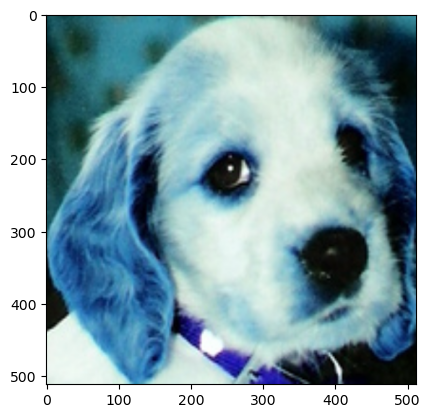

In [6]:
import torch
import os
import pandas as pd
import albumentations as A
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
# model=torch.hub.load("ultralytics/yolov5","custom",path="C:/Users/uday.bijjala/Downloads/best_retrain_yolo.pt")
c=0
l=[]
st=["hue","gaussian","gauss"]
for i in os.listdir("D:/cat_id/data/raw/train_data/yolo/images"):
    l.append(i)
random.shuffle(l)
for i in l: 
    # Define the transformation pipeline
    j=i.split(".")[0]
    d=0
    for k in st:
        if k in j:
            d=1
    if d==0:
        transform = A.Compose([
            A.Resize(512, 512),
            # A.HorizontalFlip(p=1),
            # A.RandomCrop(width=400, height=300),
            # A.RandomBrightnessContrast(p=0.5),
            #   A.Blur(p=1),
            # A.HueSaturationValue(p=1),
            # A.GaussianBlur(p=1),
            # A.RandomSizedBBoxSafeCrop(height=200,width=100),
            # A.Transpose(p=1)
            # A.Crop(x_min=0,y_min=200,x_max=500,y_max=500,p=1),
            # A.VerticalFlip(p=0.5),
            # A.RandomRotate90(p=1),
            # A.RandomGridShuffle(p=0.5),
            # A.Normalize(),
            # zoom for front facing images
            # horizontal flip for side facing images
        ], bbox_params=A.BboxParams(format="pascal_voc",label_fields=['labels']))

        # Load and preprocess an example image and bounding box coordinates
        # la=pd.read_csv("D:/cat_id/data_structure/raw/train_data/yolo/labels/00000026_008.txt")
        try:
            la=pd.read_csv(f"D:/cat_id/data/raw/train_data/yolo/labels/english_cocker_spaniel_157.txt")
            z=int(la.columns.values[0].split(" ")[0])
            if z==1:
                la=la.columns.values[0].split(" ")[1:]
                la=[float(k) for k in la]
                image = cv2.imread(f"D:/cat_id/data/raw/train_data/yolo/images/english_cocker_spaniel_157.jpg")
                # results=model(image)
                # eye_numbered=0
                # for i in results.xyxy[0]:
                #     cl=i[-1]
                #     if cl==0:
                #         eye_numbered=eye_numbered+1
                    
                bboxes = [la] 
                if z==0:
                    labels = ["cat"]
                if z==1:
                    labels=["dog"]  # Example class labels


                xmin=max(0,int(((la[0]*image.shape[1])-(la[2]*image.shape[1])/2)))
                ymin=max(0,int(((la[1]*image.shape[0])-(la[3]*image.shape[0])/2)))
                xmax=max(0,int(((la[0]*image.shape[1])+(la[2]*image.shape[1])/2)))
                ymax=max(0,int(((la[1]*image.shape[0])+(la[3]*image.shape[0])/2)))

                image1=image[ymin:ymin+(ymax-ymin),xmin:xmin+(xmax-xmin)]
                n_xmin=0
                n_ymin=0
                n_xmax=image1.shape[1]
                n_ymax=image1.shape[0]
                n_bboxes=[[n_xmin,n_ymin,n_xmax,n_ymax]]

                # Apply the transformation pipeline to the image and bounding box coordinates
                transformed = transform(image=image1, bboxes=n_bboxes, labels=labels)

                # Retrieve the transformed image and updated bounding box coordinates
                transformed_image = transformed['image']
                transformed_bboxes = transformed['bboxes']
                transformed_labels = transformed['labels']

                xmin1=int(transformed_bboxes[0][0])
                ymin1=int(transformed_bboxes[0][1])
                xmax1=int(transformed_bboxes[0][2])
                ymax1=int(transformed_bboxes[0][3])

                center_x=(xmin1 + xmax1) / 2
                center_y=(ymin1+ymax1)/2
                width=xmax1-xmin1
                height=ymax1-ymin1
                center_x_normalized = center_x / transformed_image.shape[1]
                center_y_normalized = center_y / transformed_image.shape[0]
                width_normalized = width / transformed_image.shape[1]
                height_normalized=height/transformed_image.shape[0]
                # cv2.imwrite(f"albumentations/dogs/images_face_2000/{j}_trans_dogs_face.jpg",transformed_image)

                # with open(f"albumentations/dogs/labels_face_2000/{j}_trans_dogs_face.txt","w") as file:
                #     if transformed_labels==["cat"]:
                #         file.write(str(0))
                #     if transformed_labels==["dog"]:
                #         file.write(str(1))
                #     file.write(" ")
                #     file.write(str(np.round(center_x_normalized,decimals=2)))
                #     file.write(" ")
                #     file.write(str(np.round(center_y_normalized,decimals=2)))
                #     file.write(" ")
                #     file.write(str(np.round(width_normalized,decimals=2)))
                #     file.write(" ")
                #     file.write(str(np.round(height_normalized,decimals=2)))

                # Visualize the transformed image with bounding boxes
                # for bbox, label in zip(transformed_bboxes, transformed_labels):
                #     xmin, ymin, xmax, ymax = bbox
                #     cv2.rectangle(transformed_image, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0, 255, 0), 2)
                #     cv2.putText(transformed_image, str(label), (int(xmin), int(ymin) - 10),
                #                 cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

                # Display the transformed image
                plt.imshow( transformed_image)
                print(j)
                c=c+1
                print(c)
                if c==1:
                    break
        except:
            print(0,j)

In [11]:
import torch
import os
import pandas as pd
import albumentations as A
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
# model=torch.hub.load("ultralytics/yolov5","custom",path="C:/Users/uday.bijjala/Downloads/best_retrain_yolo.pt")
c=0
l=[]
for i in os.listdir("D:/cat_id/albumentations/cats/images_remove_chin_2000"):
    l.append(i)
random.shuffle(l)
for i in l:
    # Define the transformation pipeline
    j=i.split(".")[0]
    transform = A.Compose([
        A.Resize(512, 512),
        # A.HorizontalFlip(p=1),
        # A.RandomCrop(width=400, height=300),
        # A.RandomBrightnessContrast(p=0.5),
        #   A.Blur(p=1),
        # A.HueSaturationValue(p=1),
        # A.GaussianBlur(p=1),
        # A.RandomSizedBBoxSafeCrop(height=200,width=100),
        # A.Transpose(p=1)
        # A.Crop(x_min=0,y_min=200,x_max=500,y_max=500,p=1),
        A.Rotate(p=1,limit=[320,320]),
        # A.VerticalFlip(p=0.5),
        # A.RandomRotate90(p=1),
        # A.RandomGridShuffle(p=0.5),
        # A.Normalize(),
        # zoom for front facing images
        # horizontal flip for side facing images
    ], bbox_params=A.BboxParams(format="pascal_voc",label_fields=['labels']))

    # Load and preprocess an example image and bounding box coordinates
    # la=pd.read_csv("D:/cat_id/data_structure/raw/train_data/yolo/labels/00000026_008.txt")
    try:
        la=pd.read_csv(f"D:/cat_id/albumentations/cats/labels_remove_chin_2000/{j}.txt")
        z=int(la.columns.values[0].split(" ")[0])
        if z==0:
            la=la.columns.values[0].split(" ")[1:]
            la=[float(k) for k in la]
            image = cv2.imread(f"D:/cat_id/albumentations/cats/images_remove_chin_2000/{j}.jpg")
            # results=model(image)
            # eye_numbered=0
            # for i in results.xyxy[0]:
            #     cl=i[-1]
            #     if cl==0:
            #         eye_numbered=eye_numbered+1
            # if eye_numbered==2:
                
            bboxes = [la] 
            if z==0:
                labels = ["cat"]
            if z==1:
                labels=["dog"]  # Example class labels


            xmin=max(0,int(((la[0]*image.shape[1])-(la[2]*image.shape[1])/2)))
            ymin=max(0,int(((la[1]*image.shape[0])-(la[3]*image.shape[0])/2)))
            xmax=max(0,int(((la[0]*image.shape[1])+(la[2]*image.shape[1])/2)))
            ymax=max(0,int(((la[1]*image.shape[0])+(la[3]*image.shape[0])/2)))

            image1=image[ymin:ymin+(ymax-ymin)+40,xmin:xmin+(xmax-xmin)+40]
            n_xmin=0
            n_ymin=0
            n_xmax=image1.shape[1]-40
            n_ymax=image1.shape[0]-40
            n_bboxes=[[n_xmin,n_ymin,n_xmax,n_ymax]]

            # Apply the transformation pipeline to the image and bounding box coordinates
            transformed = transform(image=image1, bboxes=n_bboxes, labels=labels)

            # Retrieve the transformed image and updated bounding box coordinates
            transformed_image = transformed['image']
            transformed_bboxes = transformed['bboxes']
            transformed_labels = transformed['labels']

            xmin1=int(transformed_bboxes[0][0])
            ymin1=int(transformed_bboxes[0][1])
            xmax1=int(transformed_bboxes[0][2])
            ymax1=int(transformed_bboxes[0][3])

            center_x=(xmin1 + xmax1) / 2
            center_y=(ymin1+ymax1)/2
            width=xmax1-xmin1
            height=ymax1-ymin1
            center_x_normalized = center_x / transformed_image.shape[1]
            center_y_normalized = center_y / transformed_image.shape[0]
            width_normalized = width / transformed_image.shape[1]
            height_normalized=height/transformed_image.shape[0]
            cv2.imwrite(f"albumentations/cats/images_cats_rotate_320/{j}_rotate_320.jpg",transformed_image)

            with open(f"albumentations/cats/labels_cats_rotate_320/{j}_rotate_320.txt","w") as file:
                if transformed_labels==["cat"]:
                    file.write(str(0))
                if transformed_labels==["dog"]:
                    file.write(str(1))
                file.write(" ")
                file.write(str(np.round(center_x_normalized,decimals=2)))
                file.write(" ")
                file.write(str(np.round(center_y_normalized,decimals=2)))
                file.write(" ")
                file.write(str(np.round(width_normalized,decimals=2)))
                file.write(" ")
                file.write(str(np.round(height_normalized,decimals=2)))

            # Visualize the transformed image with bounding boxes
            # for bbox, label in zip(transformed_bboxes, transformed_labels):
            #     xmin, ymin, xmax, ymax = bbox
            #     cv2.rectangle(transformed_image, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0, 255, 0), 2)
            #     cv2.putText(transformed_image, str(label), (int(xmin), int(ymin) - 10),
            #                 cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

            # Display the transformed image
            # plt.imshow( transformed_image)
            print(j)
            c=c+1
            print(c)
            if c==500:
                break
    except:
        print(0,j)

Cats_Test2670__hue_saturation_trans_chin_removal
1
00000604_011_trans_chin_removal
2
00001063_019_trans_chin_removal
3
00000138_007__hue_saturation__gaussianNoise_trans_chin_removal
4
00000620_010__gaussianNoise_trans_chin_removal
5
00000434_028_trans_chin_removal
6
00000209_004__gaussianNoise_trans_chin_removal
7
Bombay_156__hue_saturation_trans_chin_removal
8
00000904_018__gaussianBlur_trans_chin_removal
9
00000528_000_trans_chin_removal
10
00000344_000_trans_chin_removal
11
rotated_Cats_Test3023_16_trans_chin_removal
12
00001486_011__hue_saturation__gaussianNoise_trans_chin_removal
13
00000389_006__gaussianNoise_trans_chin_removal
14
00000595_016__gaussianNoise_trans_chin_removal
15
00000006_009__hue_saturation_trans_chin_removal
16
00000625_024_trans_chin_removal
17
rotated_00000419_023_49_trans_chin_removal
18
00000411_000_trans_chin_removal
19
00000294_014_trans_chin_removal
20
00000291_024__hue_saturation_trans_chin_removal
21
00000407_015_trans_chin_removal
22
00000855_019_tran

In [10]:
import torch
import os
import pandas as pd
import albumentations as A
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
# model=torch.hub.load("ultralytics/yolov5","custom",path="C:/Users/uday.bijjala/Downloads/best_retrain_yolo.pt")
c=0
l=[]
for i in os.listdir("D:/cat_id/albumentations/cats/images_remove_ears_2000"):
    l.append(i)

random.shuffle(l)
for i in l:
        

    # Define the transformation pipeline
    j=i.split(".")[0]
    transform = A.Compose([
        A.Resize(512, 512),
        # A.HorizontalFlip(p=1),
        # A.RandomCrop(width=400, height=300),
        # A.RandomBrightnessContrast(p=0.5),
        #   A.Blur(p=1),
        # A.HueSaturationValue(p=1),
        # A.GaussianBlur(p=1),
        # A.RandomSizedBBoxSafeCrop(height=200,width=100),
        # A.Transpose(p=1)
        # A.Crop(x_min=0,y_min=200,x_max=500,y_max=500,p=1),
        A.Rotate(p=1,limit=[320,320]),
        # A.VerticalFlip(p=0.5),
        # A.RandomRotate90(p=1),
        # A.RandomGridShuffle(p=0.5),
        # A.Normalize(),
        # zoom for front facing images
        # horizontal flip for side facing images
    ], bbox_params=A.BboxParams(format="pascal_voc",label_fields=['labels']))

    # Load and preprocess an example image and bounding box coordinates
    # la=pd.read_csv("D:/cat_id/data_structure/raw/train_data/yolo/labels/00000026_008.txt")
    try:
        la=pd.read_csv(f"D:/cat_id/albumentations/cats/labels_remove_ears_2000/{j}.txt")
        z=int(la.columns.values[0].split(" ")[0])
        if z==0:
            la=la.columns.values[0].split(" ")[1:]
            la=[float(k) for k in la]
            image = cv2.imread(f"D:/cat_id/albumentations/cats/images_remove_ears_2000/{j}.jpg")
            # results=model(image)
            # eye_numbered=0
            # for i in results.xyxy[0]:
            #     cl=i[-1]
            #     if cl==0:
            #         eye_numbered=eye_numbered+1
            # if eye_numbered==2:
                
            bboxes = [la] 
            if z==0:
                labels = ["cat"]
            if z==1:
                labels=["dog"]  # Example class labels


            xmin=max(0,int(((la[0]*image.shape[1])-(la[2]*image.shape[1])/2)))
            ymin=max(0,int(((la[1]*image.shape[0])-(la[3]*image.shape[0])/2)))
            xmax=max(0,int(((la[0]*image.shape[1])+(la[2]*image.shape[1])/2)))
            ymax=max(0,int(((la[1]*image.shape[0])+(la[3]*image.shape[0])/2)))

            image1=image[ymin:ymin+(ymax-ymin)+40,xmin:xmin+(xmax-xmin)+40]
            n_xmin=0
            n_ymin=0
            n_xmax=image1.shape[1]-40
            n_ymax=image1.shape[0]-40
            n_bboxes=[[n_xmin,n_ymin,n_xmax,n_ymax]]

            # Apply the transformation pipeline to the image and bounding box coordinates
            transformed = transform(image=image1, bboxes=n_bboxes, labels=labels)

            # Retrieve the transformed image and updated bounding box coordinates
            transformed_image = transformed['image']
            transformed_bboxes = transformed['bboxes']
            transformed_labels = transformed['labels']

            xmin1=int(transformed_bboxes[0][0])
            ymin1=int(transformed_bboxes[0][1])
            xmax1=int(transformed_bboxes[0][2])
            ymax1=int(transformed_bboxes[0][3])

            center_x=(xmin1 + xmax1) / 2
            center_y=(ymin1+ymax1)/2
            width=xmax1-xmin1
            height=ymax1-ymin1
            center_x_normalized = center_x / transformed_image.shape[1]
            center_y_normalized = center_y / transformed_image.shape[0]
            width_normalized = width / transformed_image.shape[1]
            height_normalized=height/transformed_image.shape[0]
            cv2.imwrite(f"albumentations/cats/images_cats_rotate_320/{j}_rotate_320.jpg",transformed_image)

            with open(f"albumentations/cats/labels_cats_rotate_320/{j}_rotate_320.txt","w") as file:
                if transformed_labels==["cat"]:
                    file.write(str(0))
                if transformed_labels==["dog"]:
                    file.write(str(1))
                file.write(" ")
                file.write(str(np.round(center_x_normalized,decimals=2)))
                file.write(" ")
                file.write(str(np.round(center_y_normalized,decimals=2)))
                file.write(" ")
                file.write(str(np.round(width_normalized,decimals=2)))
                file.write(" ")
                file.write(str(np.round(height_normalized,decimals=2)))

            # Visualize the transformed image with bounding boxes
            # for bbox, label in zip(transformed_bboxes, transformed_labels):
            #     xmin, ymin, xmax, ymax = bbox
            #     cv2.rectangle(transformed_image, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0, 255, 0), 2)
            #     cv2.putText(transformed_image, str(label), (int(xmin), int(ymin) - 10),
            #                 cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

            # Display the transformed image
            # plt.imshow( transformed_image)
            print(j)
            c=c+1
            print(c)
            if c==500:
                break
    except:
        print(0,j)

00000904_016_trans_ears_removal
1
rotated_00000977_011_-75_trans_ears_removal
2
00001034_008_trans_ears_removal
3
rotated_00000213_002_17_trans_ears_removal
4
Persian_15_trans_ears_removal
5
00000194_018_trans_ears_removal
6
Birman_135_trans_ears_removal
7
Persian_168_trans_ears_removal
8
00000006_025_trans_ears_removal
9
00000971_013__gaussianBlur_trans_ears_removal
10
rotated_00000668_017_-4_trans_ears_removal
11
00001149_027_trans_ears_removal
12
00000347_001_trans_ears_removal
13
00000020_017__hue_saturation_trans_ears_removal
14
00000242_010_trans_ears_removal
15
00001486_002_trans_ears_removal
16
00000170_021_trans_ears_removal
17
00000517_024_trans_ears_removal
18
00000125_016_trans_ears_removal
19
00000148_020_trans_ears_removal
20
00001300_005_trans_ears_removal
21
Maine_Coon_194_trans_ears_removal
22
00000178_005_trans_ears_removal
23
rotated_00000100_021_-18_trans_ears_removal
24
00001220_027_trans_ears_removal
25
00000973_008_trans_ears_removal
26
00000566_005_trans_ears_re

In [16]:
import torch
import os
import pandas as pd
import albumentations as A
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
# model=torch.hub.load("ultralytics/yolov5","custom",path="C:/Users/uday.bijjala/Downloads/best_retrain_yolo.pt")
c=0
l=[]
for i in os.listdir("D:/cat_id/albumentations/cats/images_remove_ears_2000"):
    l.append(i)
random.shuffle(l)
for i in l:
    # Define the transformation pipeline
    j=i.split(".")[0]
    transform = A.Compose([
        A.Resize(512, 512),
        # A.HorizontalFlip(p=1),
        # A.RandomCrop(width=400, height=300),
        # A.RandomBrightnessContrast(p=0.5),
        #   A.Blur(p=1),
        # A.HueSaturationValue(p=1),
        # A.GaussianBlur(p=1),
        # A.RandomSizedBBoxSafeCrop(height=200,width=100),
        # A.Transpose(p=1)
        # A.Crop(x_min=0,y_min=200,x_max=500,y_max=500,p=1),
        A.Rotate(p=1,limit=[40,40]),
        # A.VerticalFlip(p=0.5),
        # A.RandomRotate90(p=1),
        # A.RandomGridShuffle(p=0.5),
        # A.Normalize(),
        # zoom for front facing images
        # horizontal flip for side facing images
    ], bbox_params=A.BboxParams(format="pascal_voc",label_fields=['labels']))

    # Load and preprocess an example image and bounding box coordinates
    # la=pd.read_csv("D:/cat_id/data_structure/raw/train_data/yolo/labels/00000026_008.txt")
    try:
        la=pd.read_csv(f"D:/cat_id/albumentations/cats/labels_remove_ears_2000/{j}.txt")
        z=int(la.columns.values[0].split(" ")[0])
        if z==0:
            la=la.columns.values[0].split(" ")[1:]
            la=[float(k) for k in la]
            image = cv2.imread(f"D:/cat_id/albumentations/cats/images_remove_ears_2000/{j}.jpg")
            # results=model(image)
            # eye_numbered=0
            # for i in results.xyxy[0]:
            #     cl=i[-1]
            #     if cl==0:
            #         eye_numbered=eye_numbered+1
            # if eye_numbered==2:
                
            bboxes = [la] 
            if z==0:
                labels = ["cat"]
            if z==1:
                labels=["dog"]  # Example class labels


            xmin=max(0,int(((la[0]*image.shape[1])-(la[2]*image.shape[1])/2)))
            ymin=max(0,int(((la[1]*image.shape[0])-(la[3]*image.shape[0])/2)))
            xmax=max(0,int(((la[0]*image.shape[1])+(la[2]*image.shape[1])/2)))
            ymax=max(0,int(((la[1]*image.shape[0])+(la[3]*image.shape[0])/2)))

            image1=image[ymin:ymin+(ymax-ymin)+40,xmin:xmin+(xmax-xmin)+40]
            n_xmin=0
            n_ymin=0
            n_xmax=image1.shape[1]-40
            n_ymax=image1.shape[0]-40
            n_bboxes=[[n_xmin,n_ymin,n_xmax,n_ymax]]

            # Apply the transformation pipeline to the image and bounding box coordinates
            transformed = transform(image=image1, bboxes=n_bboxes, labels=labels)

            # Retrieve the transformed image and updated bounding box coordinates
            transformed_image = transformed['image']
            transformed_bboxes = transformed['bboxes']
            transformed_labels = transformed['labels']

            xmin1=int(transformed_bboxes[0][0])
            ymin1=int(transformed_bboxes[0][1])
            xmax1=int(transformed_bboxes[0][2])
            ymax1=int(transformed_bboxes[0][3])

            center_x=(xmin1 + xmax1) / 2
            center_y=(ymin1+ymax1)/2
            width=xmax1-xmin1
            height=ymax1-ymin1
            center_x_normalized = center_x / transformed_image.shape[1]
            center_y_normalized = center_y / transformed_image.shape[0]
            width_normalized = width / transformed_image.shape[1]
            height_normalized=height/transformed_image.shape[0]
            cv2.imwrite(f"albumentations/cats/images_cats_rotate_40/{j}_rotate_40.jpg",transformed_image)

            with open(f"albumentations/cats/labels_cats_rotate_40/{j}_rotate_40.txt","w") as file:
                if transformed_labels==["cat"]:
                    file.write(str(0))
                if transformed_labels==["dog"]:
                    file.write(str(1))
                file.write(" ")
                file.write(str(np.round(center_x_normalized,decimals=2)))
                file.write(" ")
                file.write(str(np.round(center_y_normalized,decimals=2)))
                file.write(" ")
                file.write(str(np.round(width_normalized,decimals=2)))
                file.write(" ")
                file.write(str(np.round(height_normalized,decimals=2)))

            # Visualize the transformed image with bounding boxes
            # for bbox, label in zip(transformed_bboxes, transformed_labels):
            #     xmin, ymin, xmax, ymax = bbox
            #     cv2.rectangle(transformed_image, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0, 255, 0), 2)
            #     cv2.putText(transformed_image, str(label), (int(xmin), int(ymin) - 10),
            #                 cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

            # Display the transformed image
            # plt.imshow( transformed_image)
            print(j)
            c=c+1
            print(c)
            if c==500:
                break
    except:
        print(0,j)

rotated_Persian_158_3_trans_ears_removal
1
00001077_011__gaussianNoise_trans_ears_removal
2
00000403_009__hue_saturation_trans_ears_removal
3
Bombay_160_trans_ears_removal
4
00000522_021_trans_ears_removal
5
00001123_008_trans_ears_removal
6
00001219_005_trans_ears_removal
7
00000654_027_trans_ears_removal
8
00000505_002_trans_ears_removal
9
00000504_015_trans_ears_removal
10
00001033_010_trans_ears_removal
11
Bengal_131_trans_ears_removal
12
00000686_010_trans_ears_removal
13
00000948_025_trans_ears_removal
14
00001443_023__gaussianBlur_trans_ears_removal
15
00000200_029_trans_ears_removal
16
00000634_021_trans_ears_removal
17
00000296_023_trans_ears_removal
18
00001476_014_trans_ears_removal
19
00000294_028_trans_ears_removal
20
00000109_016_trans_ears_removal
21
00000251_007_trans_ears_removal
22
00000106_016__hue_saturation_trans_ears_removal
23
rotated_Birman_120_-11_trans_ears_removal
24
00001407_013_trans_ears_removal
25
00000056_016_trans_ears_removal
26
00000138_005_trans_ears

In [15]:
import torch
import os
import pandas as pd
import albumentations as A
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
# model=torch.hub.load("ultralytics/yolov5","custom",path="C:/Users/uday.bijjala/Downloads/best_retrain_yolo.pt")
c=0
l=[]
for i in os.listdir("D:/cat_id/albumentations/cats/images_remove_chin_2000"):
    l.append(i)
random.shuffle(l)
for i in l:
    # Define the transformation pipeline
    j=i.split(".")[0]
    transform = A.Compose([
        A.Resize(512, 512),
        # A.HorizontalFlip(p=1),
        # A.RandomCrop(width=400, height=300),
        # A.RandomBrightnessContrast(p=0.5),
        #   A.Blur(p=1),
        # A.HueSaturationValue(p=1),
        # A.GaussianBlur(p=1),
        # A.RandomSizedBBoxSafeCrop(height=200,width=100),
        # A.Transpose(p=1)
        # A.Crop(x_min=0,y_min=200,x_max=500,y_max=500,p=1),
        A.Rotate(p=1,limit=[40,40]),
        # A.VerticalFlip(p=0.5),
        # A.RandomRotate90(p=1),
        # A.RandomGridShuffle(p=0.5),
        # A.Normalize(),
        # zoom for front facing images
        # horizontal flip for side facing images
    ], bbox_params=A.BboxParams(format="pascal_voc",label_fields=['labels']))

    # Load and preprocess an example image and bounding box coordinates
    # la=pd.read_csv("D:/cat_id/data_structure/raw/train_data/yolo/labels/00000026_008.txt")
    try:
        la=pd.read_csv(f"D:/cat_id/albumentations/cats/labels_remove_chin_2000/{j}.txt")
        z=int(la.columns.values[0].split(" ")[0])
        if z==0:
            la=la.columns.values[0].split(" ")[1:]
            la=[float(k) for k in la]
            image = cv2.imread(f"D:/cat_id/albumentations/cats/images_remove_chin_2000/{j}.jpg")
            # results=model(image)
            # eye_numbered=0
            # for i in results.xyxy[0]:
            #     cl=i[-1]
            #     if cl==0:
            #         eye_numbered=eye_numbered+1
            # if eye_numbered==2:
                
            bboxes = [la] 
            if z==0:
                labels = ["cat"]
            if z==1:
                labels=["dog"]  # Example class labels


            xmin=max(0,int(((la[0]*image.shape[1])-(la[2]*image.shape[1])/2)))
            ymin=max(0,int(((la[1]*image.shape[0])-(la[3]*image.shape[0])/2)))
            xmax=max(0,int(((la[0]*image.shape[1])+(la[2]*image.shape[1])/2)))
            ymax=max(0,int(((la[1]*image.shape[0])+(la[3]*image.shape[0])/2)))

            image1=image[ymin:ymin+(ymax-ymin)+40,xmin:xmin+(xmax-xmin)+40]
            n_xmin=0
            n_ymin=0
            n_xmax=image1.shape[1]-40
            n_ymax=image1.shape[0]-40
            n_bboxes=[[n_xmin,n_ymin,n_xmax,n_ymax]]

            # Apply the transformation pipeline to the image and bounding box coordinates
            transformed = transform(image=image1, bboxes=n_bboxes, labels=labels)

            # Retrieve the transformed image and updated bounding box coordinates
            transformed_image = transformed['image']
            transformed_bboxes = transformed['bboxes']
            transformed_labels = transformed['labels']

            xmin1=int(transformed_bboxes[0][0])
            ymin1=int(transformed_bboxes[0][1])
            xmax1=int(transformed_bboxes[0][2])
            ymax1=int(transformed_bboxes[0][3])

            center_x=(xmin1 + xmax1) / 2
            center_y=(ymin1+ymax1)/2
            width=xmax1-xmin1
            height=ymax1-ymin1
            center_x_normalized = center_x / transformed_image.shape[1]
            center_y_normalized = center_y / transformed_image.shape[0]
            width_normalized = width / transformed_image.shape[1]
            height_normalized=height/transformed_image.shape[0]
            cv2.imwrite(f"albumentations/cats/images_cats_rotate_40/{j}_rotate_40.jpg",transformed_image)

            with open(f"albumentations/cats/labels_cats_rotate_40/{j}_rotate_40.txt","w") as file:
                if transformed_labels==["cat"]:
                    file.write(str(0))
                if transformed_labels==["dog"]:
                    file.write(str(1))
                file.write(" ")
                file.write(str(np.round(center_x_normalized,decimals=2)))
                file.write(" ")
                file.write(str(np.round(center_y_normalized,decimals=2)))
                file.write(" ")
                file.write(str(np.round(width_normalized,decimals=2)))
                file.write(" ")
                file.write(str(np.round(height_normalized,decimals=2)))

            # Visualize the transformed image with bounding boxes
            # for bbox, label in zip(transformed_bboxes, transformed_labels):
            #     xmin, ymin, xmax, ymax = bbox
            #     cv2.rectangle(transformed_image, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0, 255, 0), 2)
            #     cv2.putText(transformed_image, str(label), (int(xmin), int(ymin) - 10),
            #                 cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

            # Display the transformed image
            # plt.imshow( transformed_image)
            print(j)
            c=c+1
            print(c)
            if c==500:
                break
    except:
        print(0,j)

00000364_002_trans_chin_removal
1
Cats_Test2512__gaussianNoise_trans_chin_removal
2
00000507_009__gaussianBlur_trans_chin_removal
3
Cats_Test1202__gaussianNoise_trans_chin_removal
4
00000322_001_trans_chin_removal
5
00000628_010_trans_chin_removal
6
00000118_019__gaussianBlur_trans_chin_removal
7
00001246_000_trans_chin_removal
8
00000273_013_trans_chin_removal
9
00001411_019_trans_chin_removal
10
00000944_028_trans_chin_removal
11
00001389_021__hue_saturation_trans_chin_removal
12
00000079_009__gaussianBlur__hue_saturation_trans_chin_removal
13
00001043_020_trans_chin_removal
14
rotated_00001495_002_11_trans_chin_removal
15
00000661_028_trans_chin_removal
16
00000643_006_trans_chin_removal
17
00000121_028_trans_chin_removal
18
00000917_023_trans_chin_removal
19
Cats_Test3609__gaussianNoise_trans_chin_removal
20
Cats_Test2670__hue_saturation_trans_chin_removal
21
Abyssinian_108_trans_chin_removal
22
00000888_021_trans_chin_removal
23
00000304_020__gaussianNoise_trans_chin_removal
24
Ra

In [13]:
import torch
import os
import pandas as pd
import albumentations as A
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
# model=torch.hub.load("ultralytics/yolov5","custom",path="C:/Users/uday.bijjala/Downloads/best_retrain_yolo.pt")
c=0
l=[]
for i in os.listdir("D:/cat_id/data/raw/train_data/yolo/images"):
    l.append(i)
random.shuffle(l)
for i in l:
    # Define the transformation pipeline
    j=i.split(".")[0]
    transform = A.Compose([
        A.Resize(512, 512),
        # A.HorizontalFlip(p=1),
        # A.RandomCrop(width=400, height=300),
        # A.RandomBrightnessContrast(p=0.5),
        #   A.Blur(p=1),
        # A.HueSaturationValue(p=1),
        # A.GaussianBlur(p=1),
        # A.RandomSizedBBoxSafeCrop(height=200,width=100),
        # A.Transpose(p=1)
        # A.Crop(x_min=0,y_min=200,x_max=500,y_max=500,p=1),
        A.Rotate(p=1,limit=[40,40]),
        # A.VerticalFlip(p=0.5),
        # A.RandomRotate90(p=1),
        # A.RandomGridShuffle(p=0.5),
        # A.Normalize(),
        # zoom for front facing images
        # horizontal flip for side facing images
    ], bbox_params=A.BboxParams(format="pascal_voc",label_fields=['labels']))

    # Load and preprocess an example image and bounding box coordinates
    # la=pd.read_csv("D:/cat_id/data_structure/raw/train_data/yolo/labels/00000026_008.txt")
    try:
        la=pd.read_csv(f"D:/cat_id/data/raw/train_data/yolo/labels/{j}.txt")
        z=int(la.columns.values[0].split(" ")[0])
        if z==0:
            la=la.columns.values[0].split(" ")[1:]
            la=[float(k) for k in la]
            image = cv2.imread(f"D:/cat_id/data/raw/train_data/yolo/images/{j}.jpg")
            # results=model(image)
            # eye_numbered=0
            # for i in results.xyxy[0]:
            #     cl=i[-1]
            #     if cl==0:
            #         eye_numbered=eye_numbered+1
            # if eye_numbered==2:
                
            bboxes = [la] 
            if z==0:
                labels = ["cat"]
            if z==1:
                labels=["dog"]  # Example class labels


            xmin=max(0,int(((la[0]*image.shape[1])-(la[2]*image.shape[1])/2)))
            ymin=max(0,int(((la[1]*image.shape[0])-(la[3]*image.shape[0])/2)))
            xmax=max(0,int(((la[0]*image.shape[1])+(la[2]*image.shape[1])/2)))
            ymax=max(0,int(((la[1]*image.shape[0])+(la[3]*image.shape[0])/2)))

            image1=image[ymin:ymin+(ymax-ymin)+40,xmin:xmin+(xmax-xmin)+40]
            n_xmin=0
            n_ymin=0
            n_xmax=image1.shape[1]-40
            n_ymax=image1.shape[0]-40
            n_bboxes=[[n_xmin,n_ymin,n_xmax,n_ymax]]

            # Apply the transformation pipeline to the image and bounding box coordinates
            transformed = transform(image=image1, bboxes=n_bboxes, labels=labels)

            # Retrieve the transformed image and updated bounding box coordinates
            transformed_image = transformed['image']
            transformed_bboxes = transformed['bboxes']
            transformed_labels = transformed['labels']

            xmin1=int(transformed_bboxes[0][0])
            ymin1=int(transformed_bboxes[0][1])
            xmax1=int(transformed_bboxes[0][2])
            ymax1=int(transformed_bboxes[0][3])

            center_x=(xmin1 + xmax1) / 2
            center_y=(ymin1+ymax1)/2
            width=xmax1-xmin1
            height=ymax1-ymin1
            center_x_normalized = center_x / transformed_image.shape[1]
            center_y_normalized = center_y / transformed_image.shape[0]
            width_normalized = width / transformed_image.shape[1]
            height_normalized=height/transformed_image.shape[0]
            cv2.imwrite(f"albumentations/cats/images_cats_rotate_40/{j}_rotate_40.jpg",transformed_image)

            with open(f"albumentations/cats/labels_cats_rotate_40/{j}_rotate_40.txt","w") as file:
                if transformed_labels==["cat"]:
                    file.write(str(0))
                if transformed_labels==["dog"]:
                    file.write(str(1))
                file.write(" ")
                file.write(str(np.round(center_x_normalized,decimals=2)))
                file.write(" ")
                file.write(str(np.round(center_y_normalized,decimals=2)))
                file.write(" ")
                file.write(str(np.round(width_normalized,decimals=2)))
                file.write(" ")
                file.write(str(np.round(height_normalized,decimals=2)))

            # Visualize the transformed image with bounding boxes
            # for bbox, label in zip(transformed_bboxes, transformed_labels):
            #     xmin, ymin, xmax, ymax = bbox
            #     cv2.rectangle(transformed_image, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0, 255, 0), 2)
            #     cv2.putText(transformed_image, str(label), (int(xmin), int(ymin) - 10),
            #                 cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

            # Display the transformed image
            # plt.imshow( transformed_image)
            print(j)
            c=c+1
            print(c)
            if c==1000:
                break
    except:
        print(0,j)

0 lizard_00ee89587afac284
0 bird_1142e4fb5f6faa66
0 salle_classe_int__hue_saturation
Sphynx_146
1
0 tv_studio_32_12_altavista
0 lizard_0bfc8b196f317d83
0 Cats_Test2028
00000257_011
2
00001173_024__hue_saturation
3
0 big_Grocery_Store
00001187_009
4
0 supermarche2__gaussianNoise
0 bird_0eb9486e342d6bad
00000508_017
5
0 salle_restaurant1
0 bird_08c9e2ae1754d631
00001468_013
6
0 bird_06281839cab63d3e
0 bird_002393688aebc335
0 lizard_7957f8e3ae6171d9
00000310_003
7
rotated_00000129_012_-32
8
00000209_014
9
00001297_004__gaussianNoise
10
Ragdoll_194
11
00000340_028
12
00000596_019
13
0 interior001__gaussianBlur
rotated_00000327_008_35
14
0 l4
00001086_015__gaussianBlur
15
0 rabbit_5e857e8747c53369
00001344_021
16
0 bird_09e37d8b20caea42__gaussianNoise
0 rabbit_19bb0460396580cb
00001474_020
17
00001490_027
18
rotated_00001064_020_-34
19
0 lizard_1eadeb9acef92515
0 lizard_07fae82d60f12ae1
0 lizard_4f31e60797cc450f__gaussianBlur
00000995_009
20
0 lizard_8fbbb5cb760af6bb
0 bird_00bbef88f4ee0a65

1


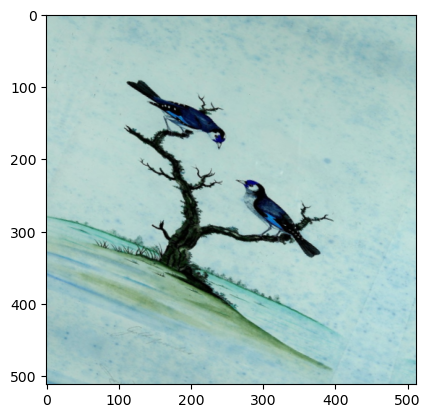

In [23]:
import torch
import os
import pandas as pd
import albumentations as A
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
import shutil
sts=["others","bird","hamster","lizard","mouse","rabbit","tortoise"]
# model=torch.hub.load("ultralytics/yolov5","custom",path="C:/Users/uday.bijjala/Downloads/best_retrain_yolo.pt")
c=0
l=[]
for i in os.listdir("D:/cat_id/data/raw/train_data/yolo/images"):
    l.append(i)
random.shuffle(l)
for i in l:
    # Define the transformation pipeline
    j=i.split(".")[0]
    for k in sts:
        if k in j:
            transform = A.Compose([
                A.Resize(512, 512),
                # A.HorizontalFlip(p=1),
                # A.RandomCrop(width=400, height=300),
                # A.RandomBrightnessContrast(p=0.5),
                #   A.Blur(p=1),
                # A.HueSaturationValue(p=1),
                # A.GaussianBlur(p=1),
                # A.RandomSizedBBoxSafeCrop(height=200,width=100),
                # A.Transpose(p=1)
                # A.Crop(x_min=0,y_min=200,x_max=500,y_max=500,p=1),
                A.Rotate(p=1,limit=[340,340]),
                # A.VerticalFlip(p=0.5),
                # A.RandomRotate90(p=1),
                # A.RandomGridShuffle(p=0.5),
                # A.Normalize(),
                # zoom for front facing images
                # horizontal flip for side facing images
            ], bbox_params=A.BboxParams(format="pascal_voc",label_fields=['labels']))

            # Load and preprocess an example image and bounding box coordinates
            # la=pd.read_csv("D:/cat_id/data_structure/raw/train_data/yolo/labels/00000026_008.txt")
            try:
                with open(f"D:/cat_id/data/raw/train_data/yolo/labels/bird_00ae16f9f9da14c0.txt","r") as file:
                    s=file.readline()
                if s=="":
                    image = cv2.imread(f"D:/cat_id/data/raw/train_data/yolo/images/bird_00ae16f9f9da14c0.jpg")
                    # results=model(image)
                    # eye_numbered=0
                    # for i in results.xyxy[0]:
                    #     cl=i[-1]
                    #     if cl==0:
                    #         eye_numbered=eye_numbered+1
                    # if eye_numbered==2:
                    
                    n_bboxes=[[20,30,40,50]]

                    # Apply the transformation pipeline to the image and bounding box coordinates
                    transformed = transform(image=image, bboxes=n_bboxes, labels=["others"])

                    # Retrieve the transformed image and updated bounding box coordinates
                    transformed_image = transformed['image']
                    # transformed_bboxes = transformed['bboxes']
                    transformed_labels = transformed['labels']
                    # print(transformed_image)
                    # cv2.imwrite(f"albumentations/others/images_others_rotate_40/{j}_rotate_40.jpg",transformed_image)
                    # shutil.copy(f"D:/cat_id/data/raw/train_data/yolo/labels/{j}.txt",f"D:/cat_id/albumentations/others/labels_others_rotate_40/{j}_rotate_40.txt")
                    # print(j)
                    c=c+1
                    plt.imshow(transformed_image)
                    print(c)
                    if c==1:
                        break
                    break
            except:
                print(0,j)
    if c==1:
        break
            

In [2]:
import torch
import os
import pandas as pd
import albumentations as A
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
import shutil
sts=["others","bird","hamster","lizard","mouse","rabbit","tortoise"]
# model=torch.hub.load("ultralytics/yolov5","custom",path="C:/Users/uday.bijjala/Downloads/best_retrain_yolo.pt")
c=0
l=[]
for i in os.listdir("D:/cat_id/data/raw/train_data/yolo/images"):
    l.append(i)
random.shuffle(l)
for i in l:
    # Define the transformation pipeline
    j=i.split(".")[0]
    for k in sts:
        if k in j:
            transform = A.Compose([
                A.Resize(512, 512),
                # A.HorizontalFlip(p=1),
                # A.RandomCrop(width=400, height=300),
                # A.RandomBrightnessContrast(p=0.5),
                #   A.Blur(p=1),
                # A.HueSaturationValue(p=1),
                # A.GaussianBlur(p=1),
                # A.RandomSizedBBoxSafeCrop(height=200,width=100),
                # A.Transpose(p=1)
                # A.Crop(x_min=0,y_min=200,x_max=500,y_max=500,p=1),
                A.Rotate(p=1,limit=[40,40]),
                # A.VerticalFlip(p=0.5),
                # A.RandomRotate90(p=1),
                # A.RandomGridShuffle(p=0.5),
                # A.Normalize(),
                # zoom for front facing images
                # horizontal flip for side facing images
            ], bbox_params=A.BboxParams(format="pascal_voc",label_fields=['labels']))

            # Load and preprocess an example image and bounding box coordinates
            # la=pd.read_csv("D:/cat_id/data_structure/raw/train_data/yolo/labels/00000026_008.txt")
            try:
                with open(f"D:/cat_id/data/raw/train_data/yolo/labels/{j}.txt","r") as file:
                    s=file.readline()
                if s=="":
                    image = cv2.imread(f"D:/cat_id/data/raw/train_data/yolo/images/{j}.jpg")
                    # results=model(image)
                    # eye_numbered=0
                    # for i in results.xyxy[0]:
                    #     cl=i[-1]
                    #     if cl==0:
                    #         eye_numbered=eye_numbered+1
                    # if eye_numbered==2:
                    
                    n_bboxes=[[20,30,40,50]]

                    # Apply the transformation pipeline to the image and bounding box coordinates
                    transformed = transform(image=image, bboxes=n_bboxes, labels=["others"])

                    # Retrieve the transformed image and updated bounding box coordinates
                    transformed_image = transformed['image']
                    # transformed_bboxes = transformed['bboxes']
                    transformed_labels = transformed['labels']
                    # print(transformed_image)
                    cv2.imwrite(f"albumentations/others/images_others_rotate_320/{j}_rotate_320.jpg",transformed_image)
                    shutil.copy(f"D:/cat_id/data/raw/train_data/yolo/labels/{j}.txt",f"D:/cat_id/albumentations/others/labels_others_rotate_320/{j}_rotate_320.txt")
                    print(j)
                    c=c+1
                    print(c)
                    if c==2000:
                        break
                    break
            except:
                print(0,j)
    if c==2000:
        break
            

bird_01083f3f7e15718b
1
bird_02facb84cc0f5d5c__hue_saturation__gaussianNoise
2
lizard_12da57da5e01134b
3
mouse_c53ce7dbef6ec36f
4
tortoise_84131ad81698a479
5
bird_067271280f30b4f5
6
tortoise_e233c1dbe941dfab
7
hamster_72e5c7b6a0b16c9f
8
tortoise_1bb218f9d91434b7__hue_saturation
9
lizard_5cf0609d767113ca
10
mouse_37f8d6f57e461f1d
11
bird_05490b19efaf6871
12
rabbit_0a8a603fa89b3c7f
13
rabbit_07bbd0cd40c19c01
14
lizard_0b0a989c2a0ab116
15
lizard_43f968fa26e9fadf
16
lizard_e57e7352f3c34d34
17
bird_162da25c3ee53ddd
18
lizard_8c586ffa3cc2d48d
19
lizard_122f34a632f20ac8
20
tortoise_40c1da62ba70452a
21
lizard_a766a23d1d5f9bc8
22
hamster_00e4465db2995332
23
tortoise_3a424949ccfd71d4
24
lizard_0cd144b57b166563
25
mouse_0c68ff04fab09448
26
bird_11889cfc480682d3__gaussianBlur
27
mouse_e0aecfe6d8640743__hue_saturation
28
bird_15b7f6e10d11d9ca
29
hamster_4b875a6494c13dad
30
bird_00574bd41ecab496
31
tortoise_e8f3903eb48787ae
32
rabbit_9ea2b860d1d19f06
33
lizard_cf631c6139a53134__gaussianBlur
34
torto

In [14]:
l

['lizard_e7c5c555e9334c25.jpg',
 'n02107142_1306.jpg',
 'Sphynx_197.jpg',
 'n02088364_17314__gaussianBlur__hue_saturation.jpg',
 'n02113186_7220.jpg',
 'rotated_Cats_Test930_-50.jpg',
 'tortoise_9f6296786c0b538c__hue_saturation.jpg',
 '00000619_022.jpg',
 'tortoise_16b1d8fcb55b1462.jpg',
 '00000254_024.jpg',
 '00000549_024.jpg',
 '00000647_022.jpg',
 'n02111889_14413__gaussianNoise.jpg',
 'n02097474_6607.jpg',
 '00000542_025.jpg',
 'n02093256_14933.jpg',
 '00000642_018.jpg',
 'n02104029_1369.jpg',
 'Cats_Test2374.png',
 '00000810_027.jpg',
 '00000576_027__gaussianNoise.jpg',
 'tortoise_6a9924689286112b.jpg',
 'n02096437_4480__gaussianBlur__hue_saturation.jpg',
 'rabbit_ed3e7af28cc2dae3.jpg',
 'lizard_ac0ce36897ba609c.jpg',
 'Ragdoll_156__gaussianNoise.jpg',
 'rotated_n02091134_4149_9.jpg',
 'n02106662_24768.jpg',
 'n02088466_7502.jpg',
 '00000834_016.jpg',
 'Cats_Test476__gaussianNoise.jpg',
 'room480.jpg',
 'rotated_00001051_010_18.jpg',
 'tortoise_14d8630659436237.jpg',
 'n02096294_4

In [10]:
import random
import shutil
l=[]
for i in os.listdir("D:/cat_id/albumentations/images_remove_chin"):
    l.append(i)
random.shuffle(l)
for i in range(2000):
    k=l[i]
    j=k.split(".")[0]
    shutil.copy(f"D:/cat_id/albumentations/images_remove_chin/{l[i]}","D:/cat_id/albumentations/cats/images_remove_chin_2000")
    shutil.copy(f"D:/cat_id/albumentations/labels_remove_chin/{j}.txt","D:/cat_id/albumentations/cats/labels_remove_chin_2000")

In [11]:
import random
import shutil
l=[]
for i in os.listdir("D:/cat_id/albumentations/images_remove_ears"):
    l.append(i)
random.shuffle(l)
for i in range(2000):
    k=l[i]
    j=k.split(".")[0]
    shutil.copy(f"D:/cat_id/albumentations/images_remove_ears/{l[i]}","D:/cat_id/albumentations/cats/images_remove_ears_2000")
    shutil.copy(f"D:/cat_id/albumentations/labels_remove_ears/{j}.txt","D:/cat_id/albumentations/cats/labels_remove_ears_2000")

In [1]:
with open("D:/cat_id/data/raw/train_data/yolo/labels/_fgi_RHM_foto_LaundryRoom_view_2_640_x_480__hue_saturation.txt","r") as file:
    s=file.readline()

In [2]:
if s=="":
    print(1)

1


In [59]:
import torch
import os
import pandas as pd
import albumentations as A
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
# model=torch.hub.load("ultralytics/yolov5","custom",path="C:/Users/uday.bijjala/Downloads/best_retrain_yolo.pt")
c=0
l=[]
for i in os.listdir("D:/cat_id/data/raw/train_data/yolo/images"):
    l.append(i)
random.shuffle(l) 
for i in l:
    # Define the transformation pipeline
    j=i.split(".")[0]
    transform = A.Compose([
        A.Resize(512, 512),
        # A.HorizontalFlip(p=1),
        # A.RandomCrop(width=400, height=300),
        # A.RandomBrightnessContrast(p=0.5),
        #   A.Blur(p=1),
        # A.HueSaturationValue(p=1),
        A.GaussNoise(p=1,var_limit=(17,17)),
        # A.RandomSizedBBoxSafeCrop(height=200,width=100),
        # A.Transpose(p=1)
        # A.Crop(x_min=0,y_min=200,x_max=500,y_max=500,p=1),
        # A.Rotate(p=1,limit=[320,320]),
        # A.VerticalFlip(p=0.5),
        # A.RandomRotate90(p=1),
        # A.RandomGridShuffle(p=0.5),
        # A.Normalize(),
        # zoom for front facing images
        # horizontal flip for side facing images
    ], bbox_params=A.BboxParams(format="pascal_voc",label_fields=['labels']))

    # Load and preprocess an example image and bounding box coordinates
    # la=pd.read_csv("D:/cat_id/data_structure/raw/train_data/yolo/labels/00000026_008.txt")
    try:
        la=pd.read_csv(f"D:/cat_id/data/raw/train_data/yolo/labels/00000013_011.txt")
        z=int(la.columns.values[0].split(" ")[0])
        if z==0:
            la=la.columns.values[0].split(" ")[1:]
            la=[float(k) for k in la]
            image = cv2.imread(f"D:/cat_id/data/raw/train_data/yolo/images/00000013_011.jpg")
            # results=model(image)
            # eye_numbered=0
            # for i in results.xyxy[0]:
            #     cl=i[-1]
            #     if cl==0:
            #         eye_numbered=eye_numbered+1
            # if eye_numbered==2:
                
            bboxes = [la] 
            if z==0:
                labels = ["cat"]
            if z==1:
                labels=["dog"]  # Example class labels


            xmin=max(0,int(((la[0]*image.shape[1])-(la[2]*image.shape[1])/2)))
            ymin=max(0,int(((la[1]*image.shape[0])-(la[3]*image.shape[0])/2)))
            xmax=max(0,int(((la[0]*image.shape[1])+(la[2]*image.shape[1])/2)))
            ymax=max(0,int(((la[1]*image.shape[0])+(la[3]*image.shape[0])/2)))

            image1=image[ymin:ymin+(ymax-ymin)+40,xmin:xmin+(xmax-xmin)+40]
            n_xmin=0
            n_ymin=0
            n_xmax=image1.shape[1]-40
            n_ymax=image1.shape[0]-40
            n_bboxes=[[n_xmin,n_ymin,n_xmax,n_ymax]]

            # Apply the transformation pipeline to the image and bounding box coordinates
            transformed = transform(image=image1, bboxes=n_bboxes, labels=labels)

            # Retrieve the transformed image and updated bounding box coordinates
            transformed_image = transformed['image']
            transformed_bboxes = transformed['bboxes']
            transformed_labels = transformed['labels']

            xmin1=int(transformed_bboxes[0][0])
            ymin1=int(transformed_bboxes[0][1])
            xmax1=int(transformed_bboxes[0][2])
            ymax1=int(transformed_bboxes[0][3])

            center_x=(xmin1 + xmax1) / 2
            center_y=(ymin1+ymax1)/2
            width=xmax1-xmin1
            height=ymax1-ymin1
            center_x_normalized = center_x / transformed_image.shape[1]
            center_y_normalized = center_y / transformed_image.shape[0]
            width_normalized = width / transformed_image.shape[1]
            height_normalized=height/transformed_image.shape[0]
            # cv2.imwrite(f"albumentations/cats/images_cats_rotate_320/{j}_rotate_320.jpg",transformed_image)

            # with open(f"albumentations/cats/labels_cats_rotate_320/{j}_rotate_320.txt","w") as file:
            #     if transformed_labels==["cat"]:
            #         file.write(str(0))
            #     if transformed_labels==["dog"]:
            #         file.write(str(1))
            #     file.write(" ")
            #     file.write(str(np.round(center_x_normalized,decimals=2)))
            #     file.write(" ")
            #     file.write(str(np.round(center_y_normalized,decimals=2)))
            #     file.write(" ")
            #     file.write(str(np.round(width_normalized,decimals=2)))
            #     file.write(" ")
            #     file.write(str(np.round(height_normalized,decimals=2)))

            # Visualize the transformed image with bounding boxes
            # for bbox, label in zip(transformed_bboxes, transformed_labels):
            #     xmin, ymin, xmax, ymax = bbox
            #     cv2.rectangle(transformed_image, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0, 255, 0), 2)
            #     cv2.putText(transformed_image, str(label), (int(xmin), int(ymin) - 10),
            #                 cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

            # Display the transformed image
            # plt.imshow( transformed_image)
            print(j)
            c=c+1
            print(c)
            if c==1:
                break
    except:
        print(0,j)

n02104029_1287__gaussianBlur
1


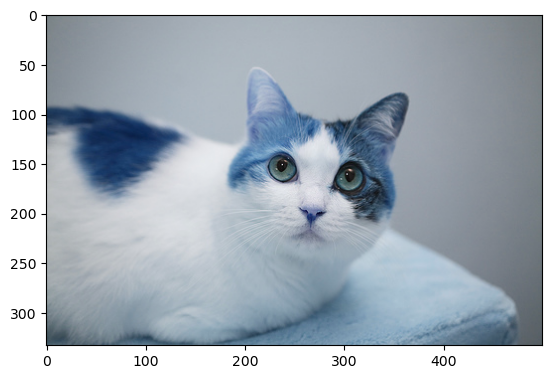

In [60]:
plt.imshow(image)

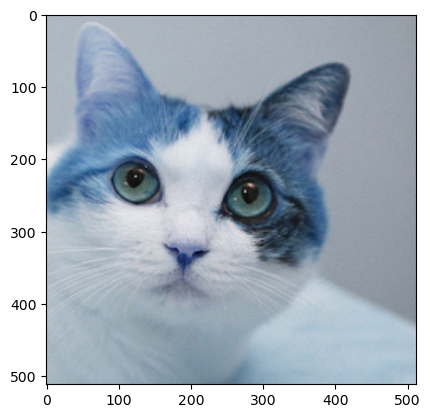

In [61]:
plt.imshow(transformed_image)

In [21]:
import torch
import os
import pandas as pd
import albumentations as A
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
# model=torch.hub.load("ultralytics/yolov5","custom",path="C:/Users/uday.bijjala/Downloads/best_retrain_yolo.pt")
c=0
l=[]
s=["hue","gaussian","gauss"]
for i in os.listdir("D:/cat_id/data/raw/train_data/yolo/images"):
    l.append(i)
random.shuffle(l) 
for i in l:
    # Define the transformation pipeline
    j=i.split(".")[0]
    if j in ign_imgs:
        continue
    d=0
    for k in s:
        if k in j:
            d=1
    if d==0:
    
        transform = A.Compose([
            # A.Resize(512, 512),
            # A.HorizontalFlip(p=1),
            # A.RandomCrop(width=400, height=300),
            # A.RandomBrightnessContrast(p=0.5),
            #   A.Blur(p=1),
            # A.HueSaturationValue(p=1),
            # A.GaussianBlur(p=1),
            # A.RandomSizedBBoxSafeCrop(height=200,width=100),
            # A.Transpose(p=1)
            # A.Crop(x_min=0,y_min=200,x_max=500,y_max=500,p=1),
            A.Rotate(p=1,limit=[340,340]),
            # A.VerticalFlip(p=0.5),
            # A.RandomRotate90(p=1),
            # A.RandomGridShuffle(p=0.5),
            # A.Normalize(),
            # zoom for front facing images
            # horizontal flip for side facing images
        ], bbox_params=A.BboxParams(format="pascal_voc",label_fields=['labels']))

        # Load and preprocess an example image and bounding box coordinates
        # la=pd.read_csv("D:/cat_id/data_structure/raw/train_data/yolo/labels/00000026_008.txt")
        try:
            la=pd.read_csv(f"D:/cat_id/data/raw/train_data/yolo/labels/{j}.txt")
            z=int(la.columns.values[0].split(" ")[0])
            if z==0:
                la=la.columns.values[0].split(" ")[1:]
                la=[float(k) for k in la]
                image = cv2.imread(f"D:/cat_id/data/raw/train_data/yolo/images/{j}.jpg")
                # results=model(image)
                # eye_numbered=0
                # for i in results.xyxy[0]:
                #     cl=i[-1]
                #     if cl==0:
                #         eye_numbered=eye_numbered+1
                # if eye_numbered==2:
                    
                bboxes = [la] 
                if z==0:
                    labels = ["cat"]
                if z==1:
                    labels=["dog"]  # Example class labels


                xmin=max(0,int(((la[0]*image.shape[1])-(la[2]*image.shape[1])/2)))
                ymin=max(0,int(((la[1]*image.shape[0])-(la[3]*image.shape[0])/2)))
                xmax=max(0,int(((la[0]*image.shape[1])+(la[2]*image.shape[1])/2)))
                ymax=max(0,int(((la[1]*image.shape[0])+(la[3]*image.shape[0])/2)))

                image1=image[ymin:ymin+(ymax-ymin)+40,xmin:xmin+(xmax-xmin)+40]
                n_xmin=0
                n_ymin=0
                n_xmax=image1.shape[1]-40
                n_ymax=image1.shape[0]-40
                n_bboxes=[[n_xmin,n_ymin,n_xmax,n_ymax]]

                # Apply the transformation pipeline to the image and bounding box coordinates
                transformed = transform(image=image1, bboxes=n_bboxes, labels=labels)

                # Retrieve the transformed image and updated bounding box coordinates
                transformed_image = transformed['image']
                transformed_bboxes = transformed['bboxes']
                transformed_labels = transformed['labels']

                xmin1=int(transformed_bboxes[0][0])
                ymin1=int(transformed_bboxes[0][1])
                xmax1=int(transformed_bboxes[0][2])
                ymax1=int(transformed_bboxes[0][3])

                center_x=(xmin1 + xmax1) / 2
                center_y=(ymin1+ymax1)/2
                width=xmax1-xmin1
                height=ymax1-ymin1
                center_x_normalized = center_x / transformed_image.shape[1]
                center_y_normalized = center_y / transformed_image.shape[0]
                width_normalized = width / transformed_image.shape[1]
                height_normalized=height/transformed_image.shape[0]
                cv2.imwrite(f"albumentations/cats/images_cats_rotate_340_same_aspect/{j}_rotate_340_same_aspect.jpg",transformed_image)

                with open(f"albumentations/cats/labels_cats_rotate_340_same_aspect/{j}_rotate_340_same_aspect.txt","w") as file:
                    if transformed_labels==["cat"]:
                        file.write(str(0))
                    if transformed_labels==["dog"]:
                        file.write(str(1))
                    file.write(" ")
                    file.write(str(np.round(center_x_normalized,decimals=2)))
                    file.write(" ")
                    file.write(str(np.round(center_y_normalized,decimals=2)))
                    file.write(" ")
                    file.write(str(np.round(width_normalized,decimals=2)))
                    file.write(" ")
                    file.write(str(np.round(height_normalized,decimals=2)))

                # Visualize the transformed image with bounding boxes
                # for bbox, label in zip(transformed_bboxes, transformed_labels):
                #     xmin, ymin, xmax, ymax = bbox
                #     cv2.rectangle(transformed_image, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0, 255, 0), 2)
                #     cv2.putText(transformed_image, str(label), (int(xmin), int(ymin) - 10),
                #                 cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

                # Display the transformed image
                # plt.imshow( transformed_image)
                print(j)
                c=c+1
                print(c)
                if c==2000:
                    break
        except:
            print(0,j)

0 Cats_Test884
00000174_011
1
0 lizard_545ee826c9377e9f
0 lizard_7aa597ad23e874d5
0 mouse_63abc10e0b5d1717
00000692_001
2
0 tortoise_b086fe3d56ac8cdb
00000452_015
3
0 oaknew2
00000103_003
4
0 tortoise_064f96598526bbfd
00000182_017
5
0 bird_0d0c724cff58cb09
0 lizard_21814a90c5708c62
0 hamster_56e38b2ed59566ae
00000521_007
6
00000622_012
7
Siamese_100
8
00000208_010
9
00000833_026
10
0 Cats_Test3175
rotated_00000058_023_-24
11
00001233_020
12
0 Cats_Test3328
00000192_010
13
00001087_014
14
0 pantry_35_12_flickr
Persian_189
15
0 tortoise_338b8b7ca4a55ca2
00000584_026
16
00000617_022
17
0 lizard_48dedf416308ec14
0 bird_0aa2a6962513e1c1
00001285_016
18
0 feijen_1
0 bird_00d1abef1c8d5f5e
00001319_003
19
00000407_022
20
0 rabbit_5210118c39318530
00000315_013
21
00000811_019
22
rotated_00001057_019_53
23
0 rabbit_0bda242ca1df5723
0 Spielzeug_31_19_flickr
00000660_026
24
00001186_003
25
00000187_025
26
00001330_020
27
0 rabbit_862c9d194d35ab62
00000863_003
28
00001319_013
29
Egyptian_Mau_18
30


In [23]:
import torch
import os
import pandas as pd
import albumentations as A
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
# model=torch.hub.load("ultralytics/yolov5","custom",path="C:/Users/uday.bijjala/Downloads/best_retrain_yolo.pt")
c=0
p=0
m=0
l=[]
s=["hue","gaussian","gauss"]
for i in os.listdir("D:/cat_id/data/raw/train_data/yolo/images"):
    l.append(i)
random.shuffle(l) 
for i in l:
    # Define the transformation pipeline
    j=i.split(".")[0]
    if j in ign_imgs:
        continue
    d=0
    for k in s:
        if k in j:
            d=1
    if d==0:
    
        transform = A.Compose([
            # A.Resize(512, 512),
            # A.HorizontalFlip(p=1),
            # A.RandomCrop(width=400, height=300),
            # A.RandomBrightnessContrast(p=0.5),
            #   A.Blur(p=1),
            # A.HueSaturationValue(p=1),
            # A.GaussianBlur(p=1),
            # A.RandomSizedBBoxSafeCrop(height=200,width=100),
            # A.Transpose(p=1)
            # A.Crop(x_min=0,y_min=200,x_max=500,y_max=500,p=1),
            A.Rotate(p=1,limit=[20,20]),
            # A.VerticalFlip(p=0.5),
            # A.RandomRotate90(p=1),
            # A.RandomGridShuffle(p=0.5),
            # A.Normalize(),
            # zoom for front facing images
            # horizontal flip for side facing images
        ], bbox_params=A.BboxParams(format="pascal_voc",label_fields=['labels']))

        # Load and preprocess an example image and bounding box coordinates
        # la=pd.read_csv("D:/cat_id/data_structure/raw/train_data/yolo/labels/00000026_008.txt")
        try:
            la=pd.read_csv(f"D:/cat_id/data/raw/train_data/yolo/labels/{j}.txt")
            z=int(la.columns.values[0].split(" ")[0])
            if z==1:
                la=la.columns.values[0].split(" ")[1:]
                la=[float(k) for k in la]
                image = cv2.imread(f"D:/cat_id/data/raw/train_data/yolo/images/{j}.jpg")
                # results=model(image)
                # eye_numbered=0
                # for i in results.xyxy[0]:
                #     cl=i[-1]
                #     if cl==0:
                #         eye_numbered=eye_numbered+1
                # if eye_numbered==2:
                    
                bboxes = [la] 
                if z==0:
                    labels = ["cat"]
                if z==1:
                    labels=["dog"]  # Example class labels


                xmin=max(0,int(((la[0]*image.shape[1])-(la[2]*image.shape[1])/2)))
                ymin=max(0,int(((la[1]*image.shape[0])-(la[3]*image.shape[0])/2)))
                xmax=max(0,int(((la[0]*image.shape[1])+(la[2]*image.shape[1])/2)))
                ymax=max(0,int(((la[1]*image.shape[0])+(la[3]*image.shape[0])/2)))

                image1=image[ymin:ymin+(ymax-ymin)+40,xmin:xmin+(xmax-xmin)+40]
                n_xmin=0
                n_ymin=0
                n_xmax=image1.shape[1]-40
                n_ymax=image1.shape[0]-40
                n_bboxes=[[n_xmin,n_ymin,n_xmax,n_ymax]]

                # Apply the transformation pipeline to the image and bounding box coordinates
                transformed = transform(image=image1, bboxes=n_bboxes, labels=labels)

                # Retrieve the transformed image and updated bounding box coordinates
                transformed_image = transformed['image']
                transformed_bboxes = transformed['bboxes']
                transformed_labels = transformed['labels']

                xmin1=int(transformed_bboxes[0][0])
                ymin1=int(transformed_bboxes[0][1])
                xmax1=int(transformed_bboxes[0][2])
                ymax1=int(transformed_bboxes[0][3])

                center_x=(xmin1 + xmax1) / 2
                center_y=(ymin1+ymax1)/2
                width=xmax1-xmin1
                height=ymax1-ymin1
                center_x_normalized = center_x / transformed_image.shape[1]
                center_y_normalized = center_y / transformed_image.shape[0]
                width_normalized = width / transformed_image.shape[1]
                height_normalized=height/transformed_image.shape[0]
                cv2.imwrite(f"albumentations/dogs/images_dogs_rotate_20_same_aspect/{j}_rotate_20_same_aspect.jpg",transformed_image)
                p=p+1
                with open(f"albumentations/dogs/labels_dogs_rotate_20_same_aspect/{j}_rotate_20_same_aspect.txt","w") as file:
                    if transformed_labels==["cat"]:
                        file.write(str(0))
                    if transformed_labels==["dog"]:
                        file.write(str(1))
                    file.write(" ")
                    file.write(str(np.round(center_x_normalized,decimals=2)))
                    file.write(" ")
                    file.write(str(np.round(center_y_normalized,decimals=2)))
                    file.write(" ")
                    file.write(str(np.round(width_normalized,decimals=2)))
                    file.write(" ")
                    file.write(str(np.round(height_normalized,decimals=2)))
                m=m+1

                # Visualize the transformed image with bounding boxes
                # for bbox, label in zip(transformed_bboxes, transformed_labels):
                #     xmin, ymin, xmax, ymax = bbox
                #     cv2.rectangle(transformed_image, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0, 255, 0), 2)
                #     cv2.putText(transformed_image, str(label), (int(xmin), int(ymin) - 10),
                #                 cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

                # Display the transformed image
                # plt.imshow( transformed_image)
                print(j)
                c=c+1
                print(c,p,m)
                if c==2000:
                    break
        except:
            print(0,j)

n02105056_5276
1 1 1
0 dining9
0 bird_00030960ec3d6aae
n02107312_5599
2 2 2
n02105056_3640
3 3 3
0 bird_02be53642dc6cca0
0 lizard_7277b16f6bb75bb5
n02112018_9861
4 4 4
n02099601_2076
5 5 5
n02093754_4721
6 6 6
japanese_chin_123
7 7 7
n02088364_4706
8 8 8
0 bird_112a926a05e5c2c1
0 hamster_0f93a42bdd5dcab1
rotated_american_pit_bull_terrier_147_22
9 9 9
0 lizard_eef21d9f49c8dd15
0 room364
n02107683_2137
10 10 10
n02102480_5706
11 11 11
0 tortoise_7c11892e9c9f92bf
0 IMG_1531
0 plato2_96_
0 hamster_0eb9f7b5ad8428ed
rotated_leonberger_176_62
12 12 12
0 tortoise_5e1de9be306aa65e
leonberger_142
13 13 13
0 rabbit_5b768b99568308eb
0 bird_12e840c1cd4e99b4
0 52014180_110805_crw_3248_kteh_27_
0 rabbit_f4b8cc3f0a9518ef
0 tortoise_8349632172cbf500
0 tortoise_1658002429bbc026
0 Cats_Test1176
rotated_n02110958_14179_-80
14 14 14
rotated_n02101388_4632_-50
15 15 15
n02100877_4506
16 16 16
0 lizard_57751feeb8a212cd
0 lizard_03a7d0db25b2cd96
pug_14
17 17 17
n02110063_12139
18 18 18
n02110185_10273
19 19 1

In [25]:
import torch
import os
import pandas as pd
import albumentations as A
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
import shutil
sts=["others","bird","hamster","lizard","mouse","rabbit","tortoise"]
st=["hue","gaussian","gauss"]
# model=torch.hub.load("ultralytics/yolov5","custom",path="C:/Users/uday.bijjala/Downloads/best_retrain_yolo.pt")
c=0
l=[]
for i in os.listdir("D:/cat_id/data/raw/train_data/yolo/images"):
    l.append(i)
random.shuffle(l)
for i in l:
    # Define the transformation pipeline
    j=i.split(".")[0]
    d=0
    for k in st:
        if k in j:
            d=1
    if d==0:
        for k in sts:
            if k in j:
                transform = A.Compose([
                    A.Resize(512, 512),
                    # A.HorizontalFlip(p=1),
                    # A.RandomCrop(width=400, height=300),
                    # A.RandomBrightnessContrast(p=0.5),
                    #   A.Blur(p=1),
                    # A.HueSaturationValue(p=1),
                    # A.GaussianBlur(p=1),
                    # A.RandomSizedBBoxSafeCrop(height=200,width=100),
                    # A.Transpose(p=1)
                    # A.Crop(x_min=0,y_min=200,x_max=500,y_max=500,p=1),
                    A.Rotate(p=1,limit=[20,20]),
                    # A.VerticalFlip(p=0.5),
                    # A.RandomRotate90(p=1),
                    # A.RandomGridShuffle(p=0.5),
                    # A.Normalize(),
                    # zoom for front facing images
                    # horizontal flip for side facing images
                ], bbox_params=A.BboxParams(format="pascal_voc",label_fields=['labels']))

                # Load and preprocess an example image and bounding box coordinates
                # la=pd.read_csv("D:/cat_id/data_structure/raw/train_data/yolo/labels/00000026_008.txt")
                try:
                    with open(f"D:/cat_id/data/raw/train_data/yolo/labels/{j}.txt","r") as file:
                        s=file.readline()
                    if s=="":
                        image = cv2.imread(f"D:/cat_id/data/raw/train_data/yolo/images/{j}.jpg")
                        # results=model(image)
                        # eye_numbered=0
                        # for i in results.xyxy[0]:
                        #     cl=i[-1]
                        #     if cl==0:
                        #         eye_numbered=eye_numbered+1
                        # if eye_numbered==2:
                        
                        n_bboxes=[[20,30,40,50]]

                        # Apply the transformation pipeline to the image and bounding box coordinates
                        transformed = transform(image=image, bboxes=n_bboxes, labels=["others"])

                        # Retrieve the transformed image and updated bounding box coordinates
                        transformed_image = transformed['image']
                        # transformed_bboxes = transformed['bboxes']
                        transformed_labels = transformed['labels']
                        # print(transformed_image)
                        cv2.imwrite(f"albumentations/others/images_others_rotate_20_same_aspect/{j}_rotate_20.jpg",transformed_image)
                        shutil.copy(f"D:/cat_id/data/raw/train_data/yolo/labels/{j}.txt",f"D:/cat_id/albumentations/others/labels_others_rotate_20_same_aspect/{j}_rotate_20.txt")
                        print(j)
                        c=c+1
                        print(c)
                        if c==2000:
                            break
                        break
                except:
                    print(0,j)
        if c==2000:
            break
            

tortoise_052dbf7b4899430b
1
bird_00083b384685315d
2
bird_106dc38fe16d4ccd
3
bird_019f741515c2124e
4
rabbit_c3e33c70e259f3c7
5
bird_0867de6069a4238c
6
tortoise_2ee8b3dfc7e4999a
7
tortoise_a57a1e2377c7a106
8
tortoise_c630369d843b799a
9
tortoise_068b676779fa79d4
10
hamster_c67616ac1b64b724
11
mouse_3c39bd61b65a424c
12
lizard_306e2d9addb46cde
13
hamster_861920ec8029679e
14
rabbit_8280c7eaf4e0dd09
15
tortoise_25a37febc75f95f2
16
bird_112094c342b40bff
17
lizard_59cd890ba8b60a49
18
tortoise_0e925854d6044fcd
19
tortoise_8f3aa43cb4a8f9ee
20
lizard_2ea5944325e95ce4
21
hamster_99e881aa1621ca56
22
hamster_ece009f63c5f4d07
23
hamster_f0cbb1077dfec0e0
24
bird_0a8171e99adfd49f
25
bird_1050901727fbf82e
26
tortoise_59a75bd77f29bf21
27
rabbit_07b4cfd27fb6aaa5
28
mouse_ee8193014042da56
29
lizard_05427c01ab6d5fde
30
rabbit_1e87cc682d0e0036
31
lizard_82639e69ba262e56
32
bird_0ec3f25584cf3914
33
bird_06b3ce0c6a995e36
34
bird_0b8492b218aeaf76
35
lizard_05f8a82f2bb90fc1
36
rabbit_0bda242ca1df5723
37
hamster_b

In [1]:
import pandas as pd
df=pd.read_excel("train_data_cleaning_new.xlsx")
df.head()

Image   IOU  Confidence o_class p_class  \
0                            00   NaN         NaN   other   other   
1                        000000   NaN         NaN   other   other   
2                  00000001_000  0.85        0.89       0     cat   
3  00000001_000__hue_saturation  0.85        0.89       0     cat   
4                  00000001_005  0.79        0.92       0     cat   

                  bb_c            pred_bb_c  
0                  NaN                  NaN  
1                  NaN                  NaN  
2  (103, 72, 317, 218)  [118, 69, 321, 227]  
3  (103, 72, 317, 218)  [121, 70, 319, 227]  
4  (-5, -41, 265, 221)     [4, 1, 270, 217]

In [2]:
df1=df[(df["IOU"]<0.4) & ((df["o_class"]==0) | (df["o_class"]==1))]
len(df1)

1245

In [3]:
df1.to_excel("adding_labels/removed_images.xlsx")

C:\Users\uday.bijjala\AppData\Local\Temp\ipykernel_50872\514625186.py:1: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  df1.to_excel("adding_labels/removed_images.xlsx")


In [3]:
ign_imgs=df1["Image"].values

In [4]:
if j in ign_imgs:
    print(1)


1245


122 27 634 532
1
2
00001194_008
1


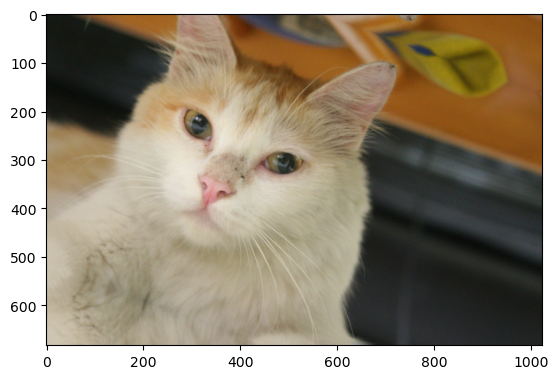

In [19]:
import torch
import os
import pandas as pd
import albumentations as A
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
# model=torch.hub.load("ultralytics/yolov5","custom",path="C:/Users/uday.bijjala/Downloads/best_retrain_yolo.pt")
c=0
l=[]
s=["hue","gaussian","gauss"]
for i in os.listdir("D:/cat_id/data/raw/train_data/yolo/images"):
    l.append(i)
random.shuffle(l) 
for i in l:
    # Define the transformation pipeline
    j=i.split(".")[0]
    if j in ign_imgs:
        continue
    d=0
    for k in s:
        if k in j:
            d=1
    if d==0:
    
        transform = A.Compose([
            # A.Resize(512, 512),
            # A.HorizontalFlip(p=1),
            # A.RandomCrop(width=400, height=300),
            # A.RandomBrightnessContrast(p=0.5),
            #   A.Blur(p=1),
            # A.HueSaturationValue(p=1),
            # A.GaussianBlur(p=1),
            # A.RandomSizedBBoxSafeCrop(height=200,width=100),
            # A.Transpose(p=1)
            # A.Crop(x_min=0,y_min=200,x_max=500,y_max=500,p=1),
            A.Rotate(p=1,limit=[340,340]),
            # A.VerticalFlip(p=0.5),
            # A.RandomRotate90(p=1),
            # A.RandomGridShuffle(p=0.5),
            # A.Normalize(),
            # zoom for front facing images
            # horizontal flip for side facing images
        ], bbox_params=A.BboxParams(format="pascal_voc",label_fields=['labels']))

        # Load and preprocess an example image and bounding box coordinates
        # la=pd.read_csv("D:/cat_id/data_structure/raw/train_data/yolo/labels/00000026_008.txt")
        try:
            la=pd.read_csv(f"D:/cat_id/data/raw/train_data/yolo/labels/00000033_021.txt")
            z=int(la.columns.values[0].split(" ")[0])
            if z==0:
                la=la.columns.values[0].split(" ")[1:]
                la=[float(k) for k in la]
                image = cv2.imread(f"D:/cat_id/data/raw/train_data/yolo/images/00000033_021.jpg")
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                # results=model(image)
                # eye_numbered=0
                # for i in results.xyxy[0]:
                #     cl=i[-1]
                #     if cl==0:
                #         eye_numbered=eye_numbered+1
                # if eye_numbered==2:
                    
                bboxes = [la] 
                if z==0:
                    labels = ["cat"]
                if z==1:
                    labels=["dog"]  # Example class labels


                xmin=max(0,int(((la[0]*image.shape[1])-(la[2]*image.shape[1])/2)))
                ymin=max(0,int(((la[1]*image.shape[0])-(la[3]*image.shape[0])/2)))
                xmax=max(0,int(((la[0]*image.shape[1])+(la[2]*image.shape[1])/2)))
                ymax=max(0,int(((la[1]*image.shape[0])+(la[3]*image.shape[0])/2)))
                print(xmin,ymin,xmax,ymax)

                # image1=image[ymin:ymin+(ymax-ymin)+40,xmin:xmin+(xmax-xmin)+40]
                # n_xmin=0
                # n_ymin=0
                # n_xmax=image1.shape[1]-40
                # n_ymax=image1.shape[0]-40
        
                n_bboxes=[[xmin,ymin,xmax,ymax]]
                print(1)
                # Apply the transformation pipeline to the image and bounding box coordinates
                transformed = transform(image=image, bboxes=n_bboxes, labels=labels)
                print(2)
                # Retrieve the transformed image and updated bounding box coordinates
                transformed_image = transformed['image']
                transformed_bboxes = transformed['bboxes']
                transformed_labels = transformed['labels']

                xmin1=int(transformed_bboxes[0][0])
                ymin1=int(transformed_bboxes[0][1])
                xmax1=int(transformed_bboxes[0][2])
                ymax1=int(transformed_bboxes[0][3])

                center_x=(xmin1 + xmax1) / 2
                center_y=(ymin1+ymax1)/2
                width=xmax1-xmin1
                height=ymax1-ymin1
                center_x_normalized = center_x / transformed_image.shape[1]
                center_y_normalized = center_y / transformed_image.shape[0]
                width_normalized = width / transformed_image.shape[1]
                height_normalized=height/transformed_image.shape[0]
                # cv2.imwrite(f"albumentations/dogs/images_dogs_rotate_40_original/{j}_rotate_40_original.jpg",transformed_image)

                # with open(f"albumentations/dogs/labels_dogs_rotate_40_original/{j}_rotate_40_original.txt","w") as file:
                #     if transformed_labels==["cat"]:
                #         file.write(str(0))
                #     if transformed_labels==["dog"]:
                #         file.write(str(1))
                #     file.write(" ")
                #     file.write(str(np.round(center_x_normalized,decimals=2)))
                #     file.write(" ")
                #     file.write(str(np.round(center_y_normalized,decimals=2)))
                #     file.write(" ")
                #     file.write(str(np.round(width_normalized,decimals=2)))
                #     file.write(" ")
                #     file.write(str(np.round(height_normalized,decimals=2)))

                # Visualize the transformed image with bounding boxes
                # for bbox, label in zip(transformed_bboxes, transformed_labels):
                #     xmin, ymin, xmax, ymax = bbox
                #     cv2.rectangle(transformed_image, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0, 255, 0), 2)
                #     cv2.putText(transformed_image, str(label), (int(xmin), int(ymin) - 10),
                #                 cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

                # Display the transformed image
                plt.imshow( transformed_image)
                print(j)
                c=c+1
                print(c)
                if c==1:
                    break
        except:
            print(0,j)

In [1]:
import pandas as pd

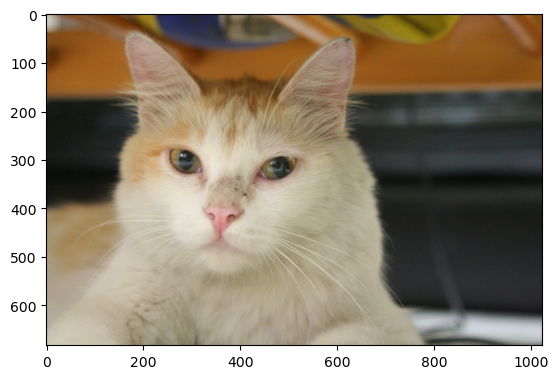

In [12]:
plt.imshow(image)

In [22]:
import os
import shutil
d=0
for i in os.listdir("D:/cat_id/data/raw/train_data/yolo/images"):
    j=i.split(".")[0]
    if j in ign_cats:
        shutil.copy(f"D:/cat_id/data/raw/train_data/yolo/images/{i}",f"D:/cat_id/less_than_0.4_iou_images/cats")

In [13]:
df2=df1[df1["o_class"]==0]

In [14]:
len(df2)

61

In [21]:
ign_cats=df1[df1["o_class"]==0]["Image"].values

In [2]:
import albumentations as A
import cv2
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

# Declare an augmentation pipeline
transform = A.Compose([
    # A.HorizontalCrop(width=256, height=256),
    A.HorizontalFlip(p=0.5),
])
for i in os.listdir("D:/cat_id/less_than_0.4_iou_images/dogs_labels/labels/"):
    j=i.split(".")[0]
    la=pd.read_csv(f"D:/cat_id/less_than_0.4_iou_images/dogs_labels/labels/{i}")
    # Read an image with OpenCV and convert it to the RGB colorspace
    la=la.columns.values[0].split(" ")[1:]
    la=[float(i) for i in la]
    image = cv2.imread(f"D:/cat_id/less_than_0.4_iou_images/dogs_labels/images/{j}.jpg")
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    xmin=int(((la[0]*image.shape[1])-(la[2]*image.shape[1])/2))
    ymin=int(((la[1]*image.shape[0])-(la[3]*image.shape[0])/2))
    xmax=int(((la[0]*image.shape[1])+(la[2]*image.shape[1])/2))
    ymax=int(((la[1]*image.shape[0])+(la[3]*image.shape[0])/2))
    cv2.rectangle(image,(xmin,ymin),(xmax,ymax),(0,255,0),2)
    cv2.imwrite(f"D:/cat_id/less_than_0.4_iou_images/dogs_labels/images1/{j}.jpg",image)

    # Augment an image
    # transformed = transform(image=image)
    # transformed_image = transformed["image"]

In [5]:
import os 
import shutil 
for i in os.listdir("D:/cat_id/data/raw/train_data/yolo/images"):
    j=i.split(".")[0]
    if j in ign_imgs:
        shutil.copy(f"D:/cat_id/data/raw/train_data/yolo/images/{i}","D:/cat_id/adding_labels/all_ignored")